In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from numpy import mean, std
from math import sqrt
    

In [21]:
df = pd.read_csv(r"E:\ny_housing_project\NY-House-Dataset-Cleaned.csv")
df.shape

(4543, 14)

In [22]:
df.head()
df['BATH'] = df['BATH'].astype(str).str.replace(',', '.')
df['BATH'] = df['BATH'].astype(float).astype(int)


In [23]:
df_luxury = df[df['LUXURY']]
df_normal = df[~df['LUXURY']]

# Exploratory Data Analysis (EDA)
## 1.1. Phân tích Định tính & Định lượng Cơ bản


In [24]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Kích thước dữ liệu:", df_normal.shape)
print("\nThông tin các cột và kiểu dữ liệu:")
print(df_normal.info())
print("\nThống kê mô tả cho các cột số:")
display(df_normal.describe())

df_normal.sort_values(by='PRICE_PER_SQFT',ascending=True)

Kích thước dữ liệu: (3726, 14)

Thông tin các cột và kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 3726 entries, 0 to 4528
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        3726 non-null   object 
 1   PRICE              3726 non-null   int64  
 2   BEDS               3726 non-null   int64  
 3   BATH               3726 non-null   int64  
 4   PROPERTYSQFT       3726 non-null   float64
 5   FORMATTED_ADDRESS  3726 non-null   object 
 6   LATITUDE           3726 non-null   float64
 7   LONGITUDE          3726 non-null   float64
 8   STATUS             3726 non-null   object 
 9   PROPERTY_TYPE      3726 non-null   object 
 10  ZIP                3726 non-null   int64  
 11  BOROUGH            3726 non-null   object 
 12  PRICE_PER_SQFT     3726 non-null   float64
 13  LUXURY             3726 non-null   bool   
dtypes: bool(1), float64(4), int64(4), object(5)
memory usage: 

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,ZIP,PRICE_PER_SQFT
count,"3,726.00","3,726.00","3,726.00","3,726.00","3,726.00","3,726.00","3,726.00","3,726.00"
mean,"780,770.00",3.02,1.97,"1,761.14",40.71,-73.93,"10,830.63",496.93
std,"447,470.05",1.95,1.14,811.65,0.09,0.11,550.83,305.89
min,"49,500.00",1.00,1.00,230.00,40.50,-74.25,"10,001.00",45.33
25%,"425,000.00",2.00,1.00,"1,066.00",40.63,-73.98,"10,306.00",298.34
50%,"699,000.00",3.00,2.00,"2,041.00",40.72,-73.93,"11,207.00",430.57
75%,"999,999.00",4.00,2.00,"2,184.21",40.77,-73.86,"11,357.00",624.17
max,"1,999,999.00",19.00,10.00,"7,854.00",40.91,-73.70,"11,697.00","2,976.19"


,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
42,5 boro corp,99000,1,1,"2,184.21","1368 E 92nd St #300, Brooklyn, NY 11236, USA",40.64,-73.90,unknown,condo,11236,Brooklyn,45.33,False
65,keller williams,109000,1,1,"2,184.21","335 E 209th St Apt 4, Bronx, NY 10467, USA",40.88,-73.87,unknown,co op,10467,Bronx,49.90,False
1764,nobroker,115000,3,1,"2,184.21","87-15 165th St #6c, Jamaica, NY 11432, USA",40.71,-73.80,unknown,co op,11432,Queens,52.65,False
2686,meyers enterprise,119000,3,2,"2,184.21","3652 De Reimer Ave, Bronx, NY 10466, USA",40.88,-73.84,unknown,land,10466,Manhattan,54.48,False
1939,la rosa new york,119000,3,1,"2,184.21","86-16 60th Ave #1c, Elmhurst, NY 11373, USA",40.73,-73.87,pending,other,11373,Queens,54.48,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,compass,1995000,1,2,910.00,"29 W 85th St # 1, New York, NY 10024, USA",40.79,-73.97,unknown,condo,10024,Manhattan,"2,192.31",False
2006,corcoran,1200000,3,1,500.00,"299 W 12th St #3b, New York, NY 10014, USA",40.74,-74.01,unknown,condo,10014,Manhattan,"2,400.00",False
420,corcoran,1995000,1,1,826.00,"Devonshire House, 28 E 10th St #1k, New York, ...",40.73,-73.99,unknown,condo,10003,Manhattan,"2,415.25",False
598,corcoran,1850000,1,1,703.00,"25 5th Ave #5g, New York, NY 10003, USA",40.73,-74.00,unknown,condo,10003,Manhattan,"2,631.58",False


Phân bổ giá lệch phải mạnh, chủ yếu tập trung ở phân khúc 400k–1M USD.

Manhattan nổi bật với giá/sqft cao nhất (~1.000 USD/sqft), trong khi Bronx/Queens có nhiều căn hộ giá rẻ.

Outlier tồn tại ở số phòng ngủ (19), diện tích (2.184 sqft lặp lại nhiều lần, nghi ngờ dữ liệu nhập).

Thị trường đa dạng: từ căn hộ nhỏ vài chục nghìn đô đến bất động sản gần 2 triệu đô, phù hợp nhiều đối tượng người mua.

In [25]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.float_format', '{:,.2f}'.format)
print("Kích thước dữ liệu:", df_luxury.shape)

print("\nThông tin các cột và kiểu dữ liệu:")
print(df_luxury.info())
print("\nThống kê mô tả cho các cột số:")
display(df_luxury.describe())


df_luxury.sort_values(by='PRICE_PER_SQFT',ascending=True)

Kích thước dữ liệu: (817, 14)

Thông tin các cột và kiểu dữ liệu:
<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 22 to 4542
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BROKERTITLE        817 non-null    object 
 1   PRICE              817 non-null    int64  
 2   BEDS               817 non-null    int64  
 3   BATH               817 non-null    int64  
 4   PROPERTYSQFT       817 non-null    float64
 5   FORMATTED_ADDRESS  817 non-null    object 
 6   LATITUDE           817 non-null    float64
 7   LONGITUDE          817 non-null    float64
 8   STATUS             817 non-null    object 
 9   PROPERTY_TYPE      817 non-null    object 
 10  ZIP                817 non-null    int64  
 11  BOROUGH            817 non-null    object 
 12  PRICE_PER_SQFT     817 non-null    float64
 13  LUXURY             817 non-null    bool   
dtypes: bool(1), float64(4), int64(4), object(5)
memory usage: 9

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE,ZIP,PRICE_PER_SQFT
count,817.00,817.00,817.00,817.00,817.00,817.00,817.00,817.00
mean,"7,099,559.27",4.92,4.10,"4,072.74",40.73,-73.97,"10,431.84","2,068.34"
std,"10,259,840.13",4.26,3.47,"4,666.25",0.06,0.05,563.39,"2,302.46"
min,"2,000,000.00",1.00,1.00,750.00,40.52,-74.22,"10,001.00",105.37
25%,"2,599,999.00",3.00,2.00,"2,184.21",40.70,-73.99,"10,019.00","1,006.72"
50%,"3,900,000.00",4.00,4.00,"2,584.00",40.74,-73.97,"10,029.00","1,542.89"
75%,"7,500,000.00",6.00,5.00,"4,412.00",40.77,-73.96,"11,209.00","2,286.87"
max,"195,000,000.00",50.00,50.00,"65,535.00",40.90,-73.74,"11,694.00","27,469.91"


,BROKERTITLE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,STATUS,PROPERTY_TYPE,ZIP,BOROUGH,PRICE_PER_SQFT,LUXURY
2766,myc inc,5827000,3,2,"55,300.00","99-44 62nd Ave, Flushing, NY 11374, USA",40.74,-73.86,unknown,multi family home,11374,Manhattan,105.37,True
2763,link ny,2300000,3,2,"21,000.00","96 E 208th St, Bronx, NY 10467, USA",40.88,-73.88,unknown,multi family home,10467,Manhattan,109.52,True
4534,coldwell banker,2700000,24,24,"18,936.00","3520 Newkirk Ave #24, Brooklyn, NY 11203, USA",40.64,-73.94,unknown,multi family home,11203,Brooklyn,142.59,True
2732,andrew lichtenstein inc,7200000,3,2,"48,000.00","3650 Bronx Blvd, Bronx, NY 10467, USA",40.88,-73.87,unknown,multi family home,10467,Manhattan,150.00,True
2824,american dream kalaba,3200000,3,2,"17,000.00","151 Daniel Low Terrace, Staten Island, NY 1030...",40.64,-74.08,unknown,multi family home,10301,Manhattan,188.24,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,corcoran,34000000,3,8,"2,184.21","217 W 21st St, New York, NY 10011, USA",40.74,-74.00,unknown,multi family home,10011,Manhattan,"15,566.28",True
3958,sotheby's,44500000,5,6,"2,184.21","2 E 67th St Fl 9, New York, NY 10065, USA",40.77,-73.97,unknown,co op,10065,Manhattan,"20,373.52",True
3748,sotheby's,45000000,5,2,"2,184.21","4 E 66th St Fl 7, New York, NY 10065, USA",40.77,-73.97,unknown,co op,10065,Manhattan,"20,602.43",True
3734,corcoran,48000000,5,2,"2,184.21","740 Park Ave #5, New York, NY 10021, USA",40.77,-73.96,unknown,co op,10021,Manhattan,"21,975.93",True


In [26]:

print("=== KẾT QUẢ PHÂN TÍCH NHANH ===")
print(f"Tổng số nhà: {len(df)}")
print(f"Số nhà luxury: {len(df_luxury)}")
print(f"Số nhà thường: {len(df_normal)}")
print(f"\n Giá trung vị phân khúc:")
print(f"- Luxury: {df_luxury['PRICE_PER_SQFT'].median():.1f}")
print(f"- Thường: {df_normal['PRICE_PER_SQFT'].median():.1f}")
print(f"\nSố phòng ngủ trung bình:")
print(f"- Luxury: {df_luxury['BEDS'].mean():.1f}")
print(f"- Thường: {df_normal['BEDS'].mean():.1f}")
print(f"\nPhân bổ ở Manhattan:")
print(f"- Luxury: {(df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100):.1f}%")
print(f"- Thường: {(df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100):.1f}%")

=== KẾT QUẢ PHÂN TÍCH NHANH ===
Tổng số nhà: 4543
Số nhà luxury: 817
Số nhà thường: 3726

 Giá trung vị phân khúc:
- Luxury: 1542.9
- Thường: 430.6

Số phòng ngủ trung bình:
- Luxury: 4.9
- Thường: 3.0

Phân bổ ở Manhattan:
- Luxury: 96.6%
- Thường: 67.9%


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Phân khúc", y="Số nhà", data=summary_data, ax=axes[0,0], palette="Set2")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Phân khúc", y="Giá trung vị (Price/Sqft)", data=summary_data, ax=axes[0,1], palette="Set1")
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1463758217.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Phân khúc", y="Số phòng ngủ TB", d

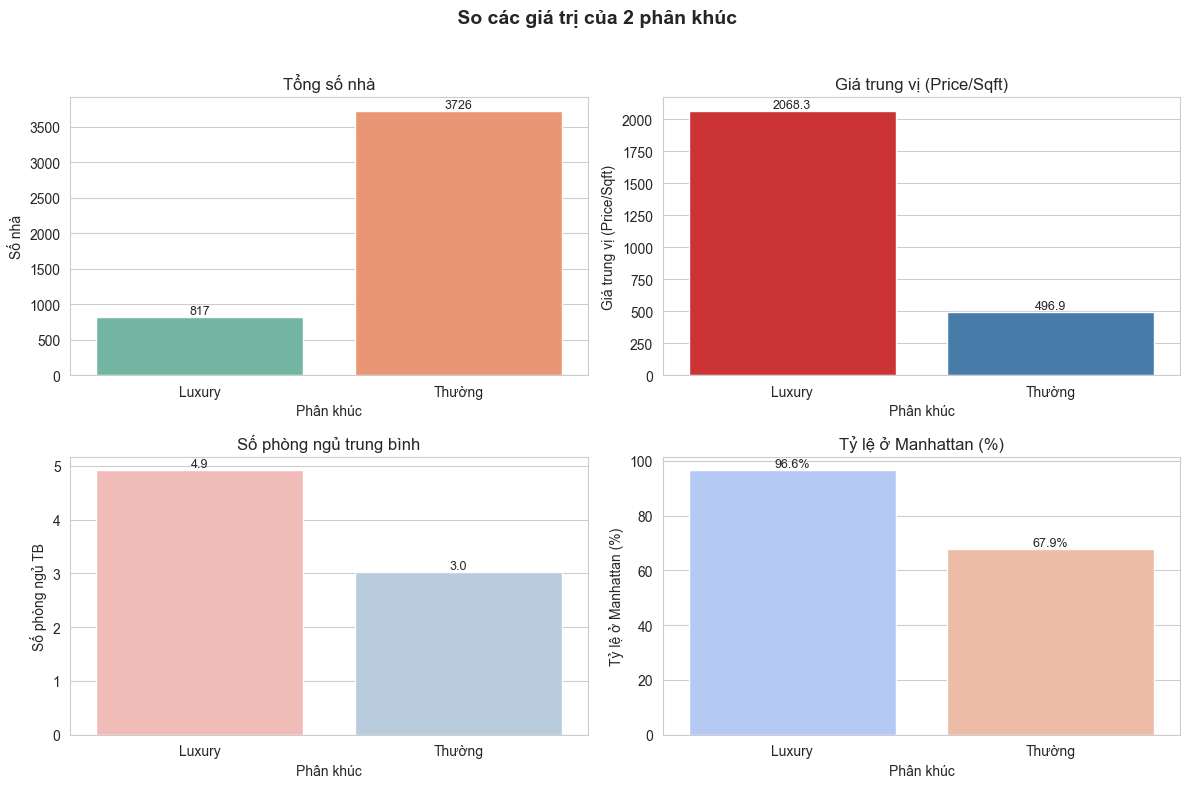

In [27]:

# Chuẩn bị dữ liệu
summary_data = {
    "Phân khúc": ["Luxury", "Thường"],
    "Số nhà": [len(df_luxury), len(df_normal)],
    "Giá trung vị (Price/Sqft)": [df_luxury['PRICE_PER_SQFT'].mean(), 
                                  df_normal['PRICE_PER_SQFT'].mean()],
    "Số phòng ngủ TB": [df_luxury['BEDS'].mean(), df_normal['BEDS'].mean()],
    "Tỷ lệ ở Manhattan (%)": [
        df_luxury['BOROUGH'].str.contains('Manhattan').sum() / len(df_luxury) * 100,
        df_normal['BOROUGH'].str.contains('Manhattan').sum() / len(df_normal) * 100
    ]
}

# Vẽ biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle(" So các giá trị của 2 phân khúc", fontsize=14, fontweight='bold')

# 1. Tổng số nhà
sns.barplot(x="Phân khúc", y="Số nhà", data=summary_data, ax=axes[0,0], palette="Set2")
axes[0,0].set_title("Tổng số nhà")
for p in axes[0,0].patches:
    axes[0,0].annotate(f"{int(p.get_height())}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 2. Giá trung vị
sns.barplot(x="Phân khúc", y="Giá trung vị (Price/Sqft)", data=summary_data, ax=axes[0,1], palette="Set1")
axes[0,1].set_title("Giá trung vị (Price/Sqft)")
for p in axes[0,1].patches:
    axes[0,1].annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 3. Số phòng ngủ TB
sns.barplot(x="Phân khúc", y="Số phòng ngủ TB", data=summary_data, ax=axes[1,0], palette="Pastel1")
axes[1,0].set_title("Số phòng ngủ trung bình")
for p in axes[1,0].patches:
    axes[1,0].annotate(f"{p.get_height():.1f}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

# 4. Tỷ lệ ở Manhattan
sns.barplot(x="Phân khúc", y="Tỷ lệ ở Manhattan (%)", data=summary_data, ax=axes[1,1], palette="coolwarm")
axes[1,1].set_title("Tỷ lệ ở Manhattan (%)")
for p in axes[1,1].patches:
    axes[1,1].annotate(f"{p.get_height():.1f}%", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha="center", va="bottom", fontsize=9)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



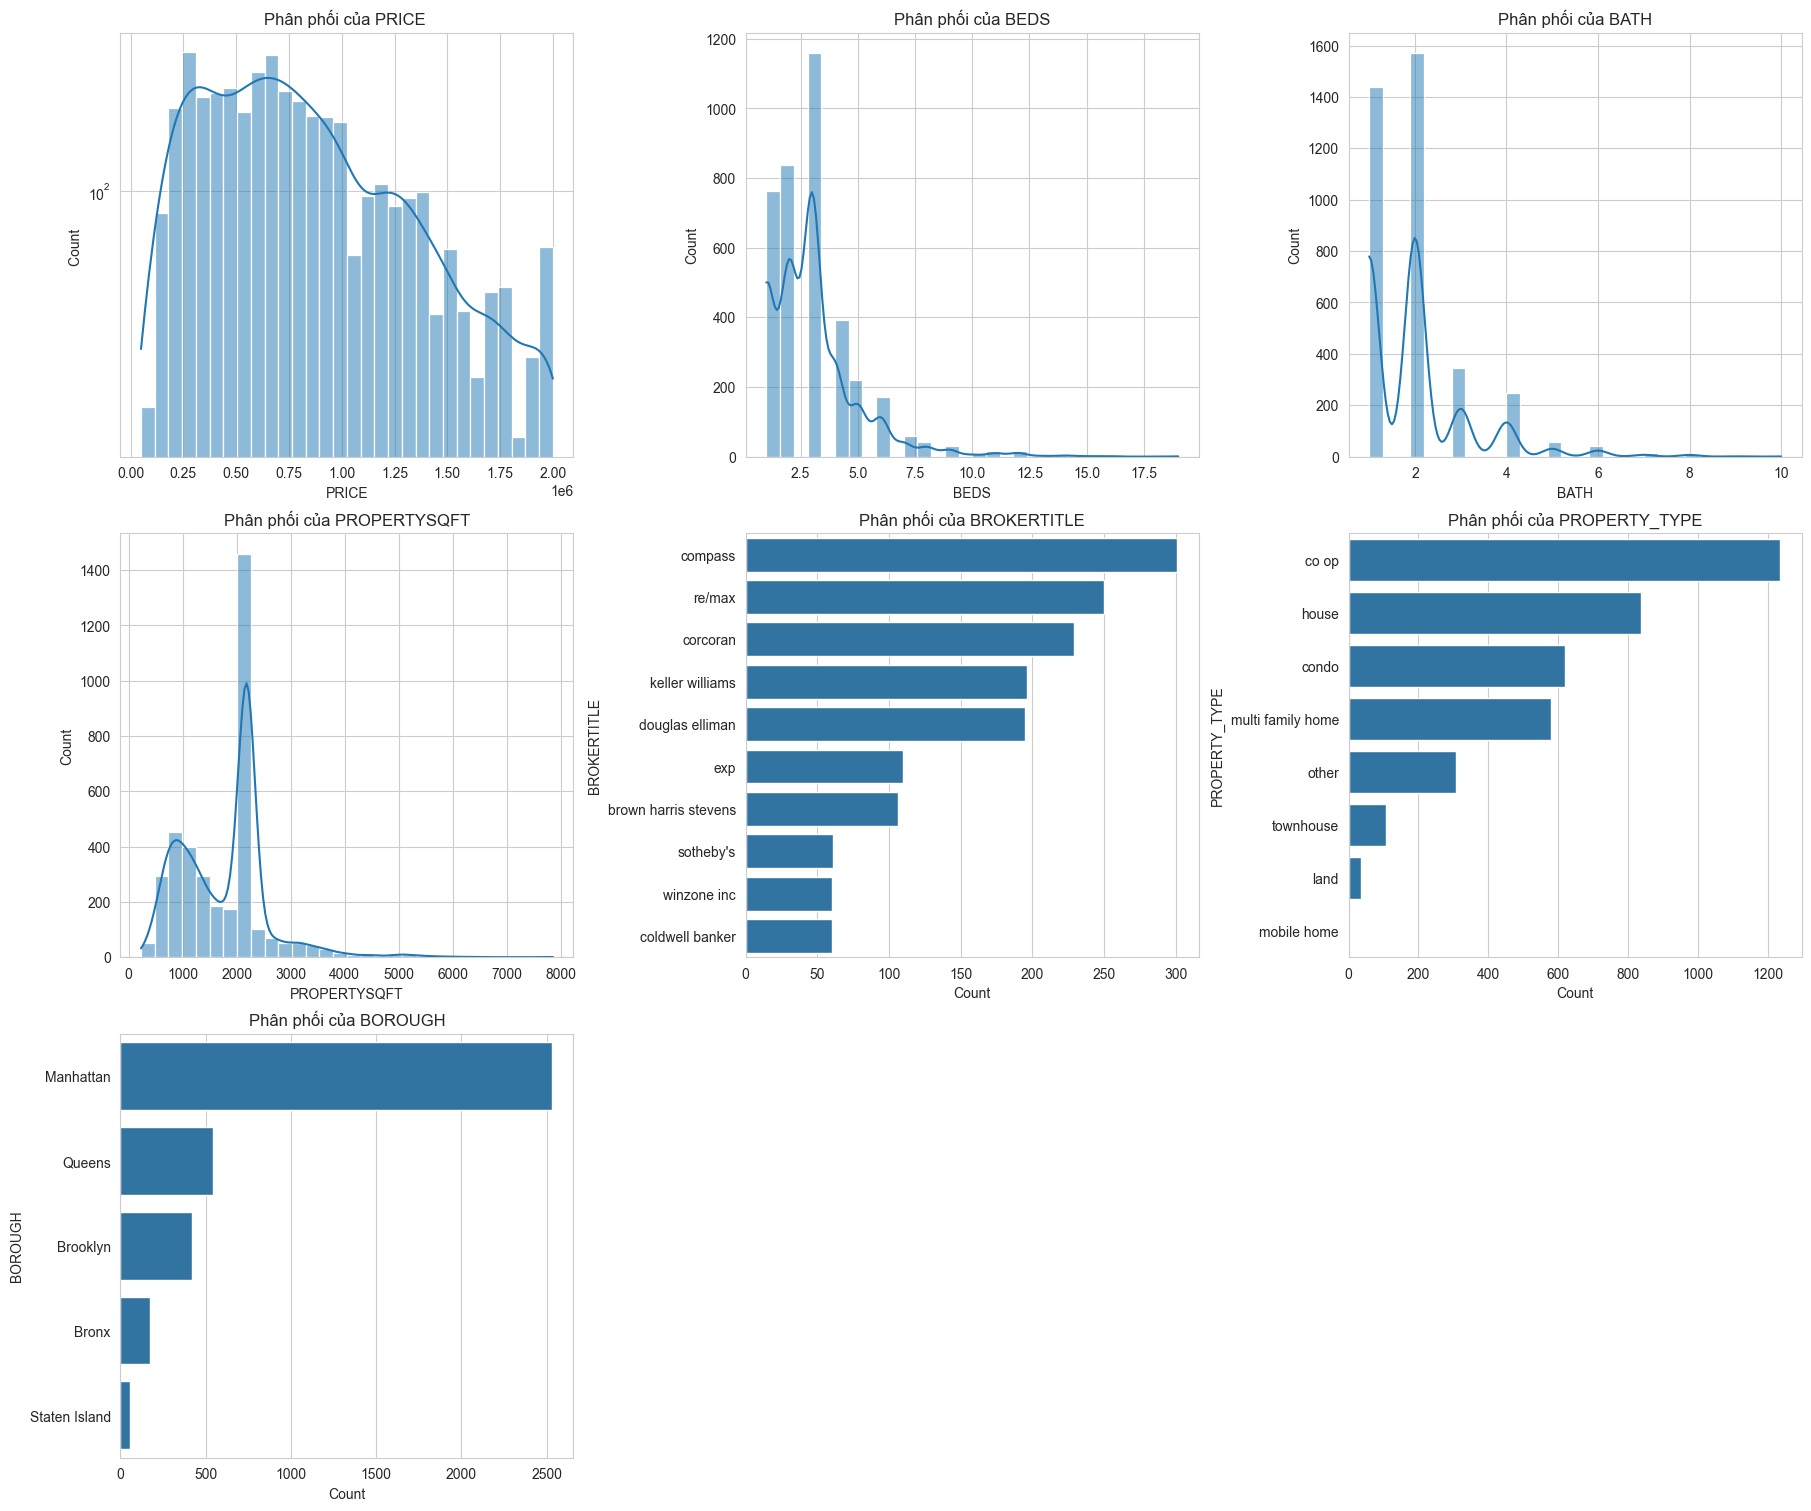

In [28]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_yscale('log') 
            ax.set_title(f'Phân phối của {column} ')
            ax.set_ylabel('Count ')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_normal, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

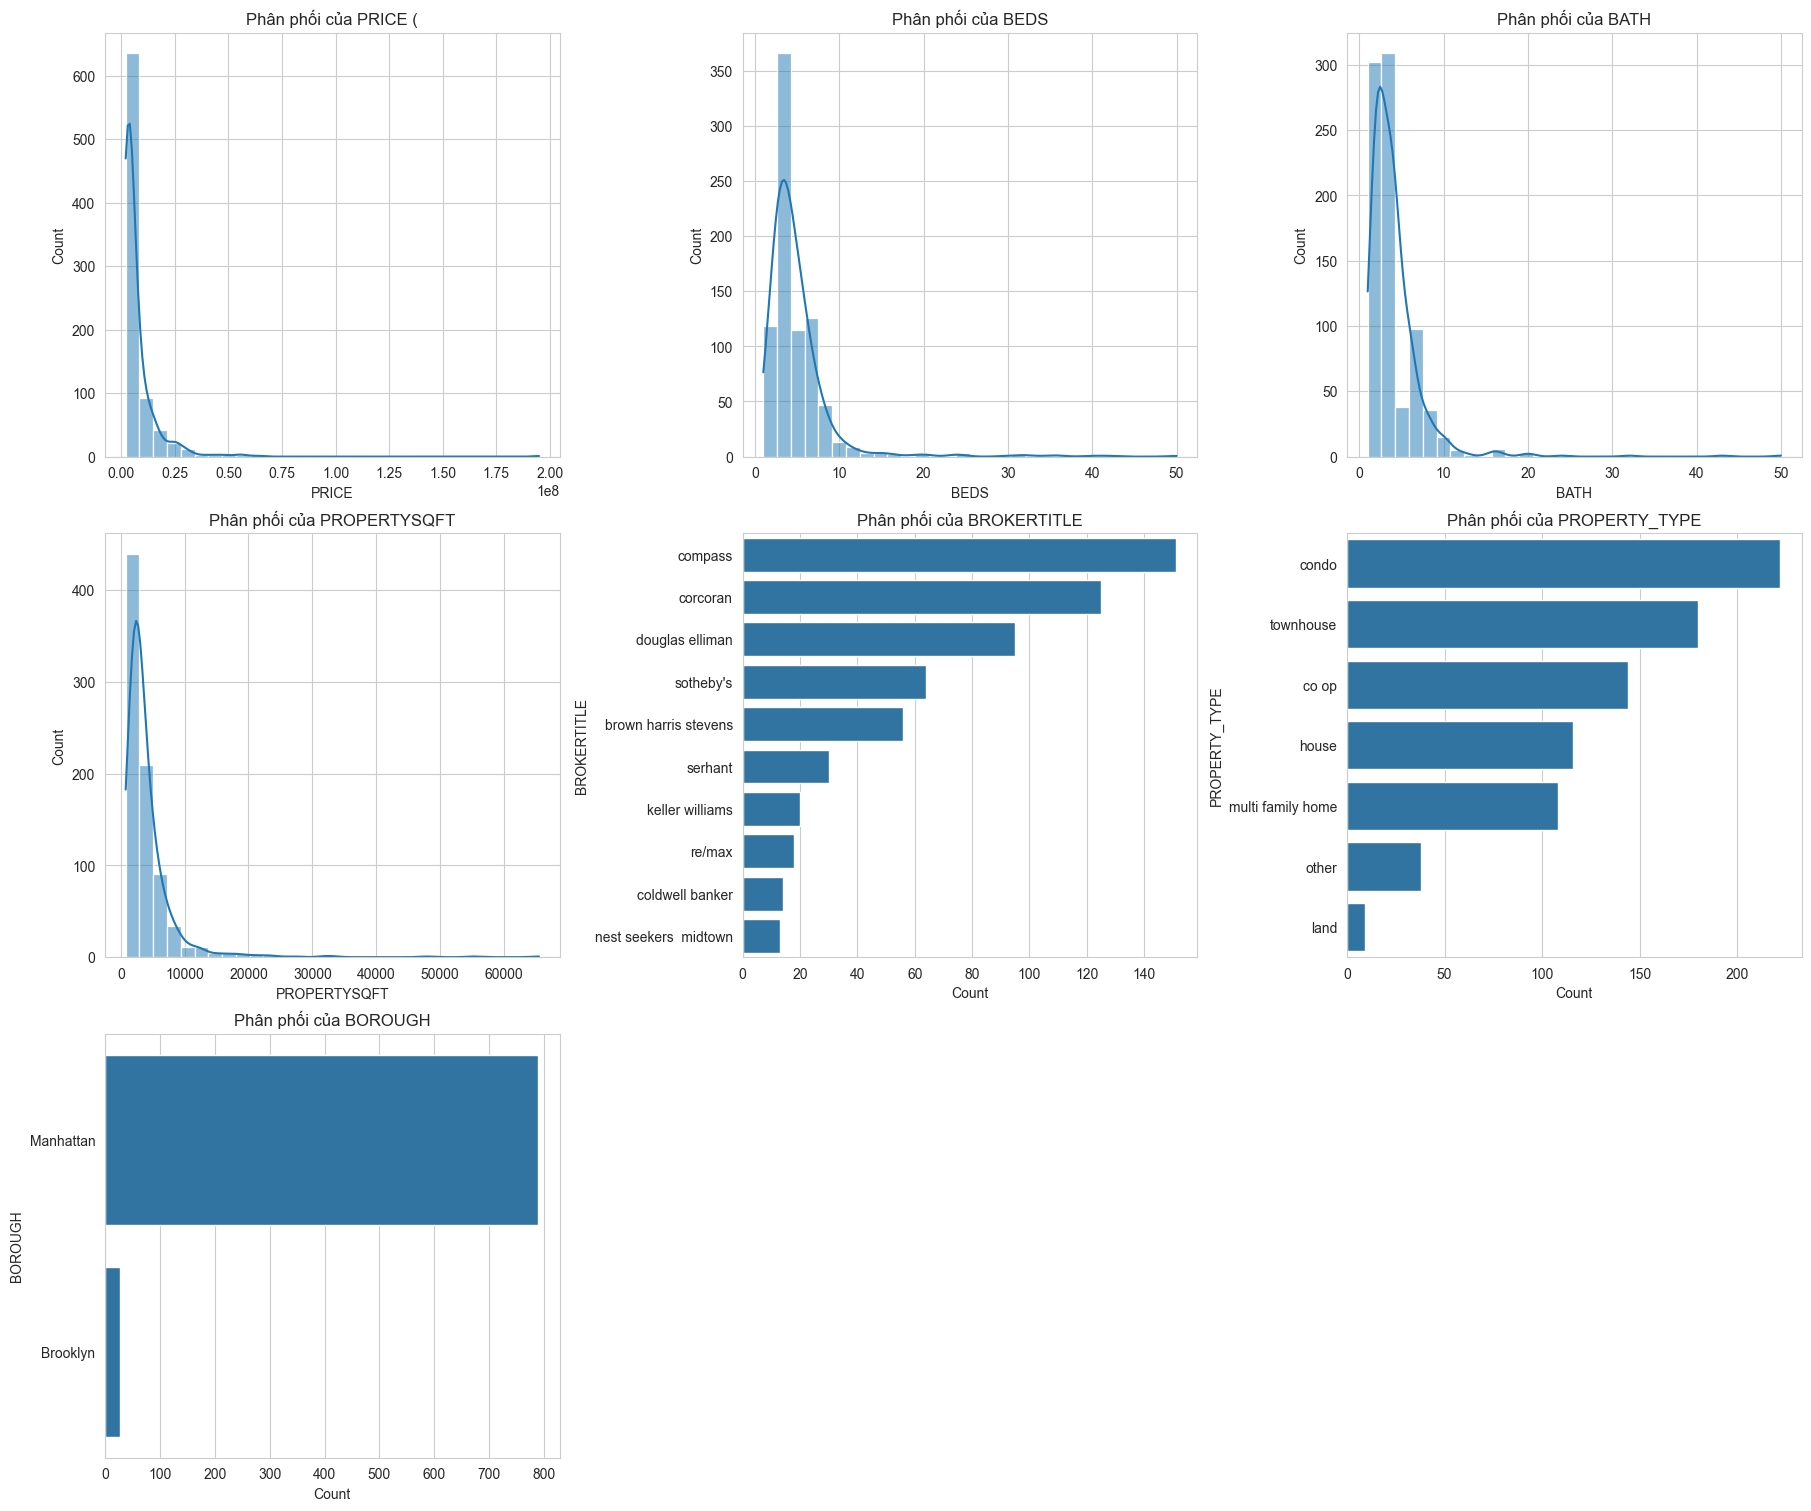

In [29]:
def plot_univariate_distribution(ax, df, column, plot_type='histogram'):
    if plot_type == 'histogram':
        sns.histplot(df[column], kde=True, bins=30, ax=ax)
        if column == 'PRICE':
            ax.set_title(f'Phân phối của {column} (')
            ax.set_ylabel('Count')
        else:
            ax.set_title(f'Phân phối của {column}')
            ax.set_ylabel('Count')
        ax.set_xlabel(column)
    elif plot_type == 'countplot':
        sns.countplot(y=df[column], order=df[column].value_counts().index[:10], ax=ax)
        ax.set_title(f'Phân phối của {column}')
        ax.set_xlabel('Count')
        ax.set_ylabel(column)

# Danh sách các cột
numerical_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
categorical_cols = ['BROKERTITLE', 'PROPERTY_TYPE', 'BOROUGH']
all_cols = numerical_cols + categorical_cols

# Vẽ biểu đồ theo lưới 3 cột
n_cols = 3  
n_rows = (len(all_cols) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()  

# Vẽ từng cột
for i, col in enumerate(all_cols):
    plot_type = 'histogram' if col in numerical_cols else 'countplot'
    plot_univariate_distribution(axes[i], df_luxury, col, plot_type=plot_type)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

Luxury có giá trung bình 5.7M còn thường chắc thấp hơn nhiều.

Nếu chỉ nhìn bảng thì ta thấy “luxury đắt hơn”.

Nhưng để chắc chắn, ta làm t-test so sánh giá giữa 2 phân khúc.


In [30]:
t_stat, p_value = stats.ttest_ind(
    df_luxury['PRICE'], 
    df_normal['PRICE'], 
    equal_var=False  # Welch's t-test, an toàn khi phương sai 2 nhóm khác nhau
)

print("So sánh giá trung bình giữa Luxury và Thường")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Luxury thật sự đắt hơn thường với ý nghĩa thống kê (p < 0.05).")
else:
    print("Không đủ bằng chứng để kết luận Luxury đắt hơn thường.")

# Bạn có thể kiểm định tương tự cho giá/m²
t_stat_psqft, p_value_psqft = stats.ttest_ind(
    df_luxury['PRICE_PER_SQFT'], 
    df_normal['PRICE_PER_SQFT'], 
    equal_var=False
)

print("\nSo sánh giá/m² giữa Luxury và Thường")
print(f"T-statistic: {t_stat_psqft:.2f}")
print(f"P-value: {p_value_psqft:.5f}")

if p_value_psqft < 0.05:
    print("Luxury thật sự có giá/m² cao hơn với ý nghĩa thống kê.")
else:
    print(" Không đủ bằng chứng để kết luận Luxury có giá/m² cao hơn.")

So sánh giá trung bình giữa Luxury và Thường
T-statistic: 17.60
P-value: 0.00000
Luxury thật sự đắt hơn thường với ý nghĩa thống kê (p < 0.05).

So sánh giá/m² giữa Luxury và Thường
T-statistic: 19.47
P-value: 0.00000
Luxury thật sự có giá/m² cao hơn với ý nghĩa thống kê.


In [31]:
summary = {
    "Chỉ số": [
        "Giá trung bình (Avg Price)",
        "Giá trung vị (Median Price)",
        "Giá/m² trung bình (Avg PPSQFT)",
        "Số phòng tắm trung bình (Avg Bath)",
        "Số phòng ngủ trung bình (Avg Beds)",
        "Diện tích trung bình (Avg SqFt)"
    ],
    "Phân khúc Thường": [
        df_normal['PRICE'].mean(),
        df_normal['PRICE'].median(),
        df_normal['PRICE_PER_SQFT'].mean(),
        df_normal['BATH'].mean(),
        df_normal['BEDS'].mean(),
        df_normal['PROPERTYSQFT'].mean()
    ],
    "Phân khúc Luxury": [
        df_luxury['PRICE'].mean(),
        df_luxury['PRICE'].median(),
        df_luxury['PRICE_PER_SQFT'].mean(),
        df_luxury['BATH'].mean(),
        df_luxury['BEDS'].mean(),
        df_luxury['PROPERTYSQFT'].mean()
    ]
}

comparison_df = pd.DataFrame(summary)

comparison_df["Tỷ lệ Chênh lệch (Luxury/Thường)"] = (
    comparison_df["Phân khúc Luxury"] / comparison_df["Phân khúc Thường"]
)

def format_value(val, is_price=False):
    if is_price:
        return f"${val:,.0f}"
    else:
        return f"{val:.1f}"

comparison_df["Phân khúc Thường"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Phân khúc Thường"])
]
comparison_df["Phân khúc Luxury"] = [
    format_value(v, i < 2) for i, v in enumerate(summary["Phân khúc Luxury"])
]
comparison_df["Tỷ lệ Chênh lệch (Luxury/Thường)"] = [
    f"{v:.1f}x" for v in comparison_df["Tỷ lệ Chênh lệch (Luxury/Thường)"]
]

print(comparison_df.to_string(index=False))


                            Chỉ số Phân khúc Thường Phân khúc Luxury Tỷ lệ Chênh lệch (Luxury/Thường)
        Giá trung bình (Avg Price)         $780,770       $7,099,559                             9.1x
       Giá trung vị (Median Price)         $699,000       $3,900,000                             5.6x
    Giá/m² trung bình (Avg PPSQFT)            496.9           2068.3                             4.2x
Số phòng tắm trung bình (Avg Bath)              2.0              4.1                             2.1x
Số phòng ngủ trung bình (Avg Beds)              3.0              4.9                             1.6x
   Diện tích trung bình (Avg SqFt)           1761.1           4072.7                             2.3x


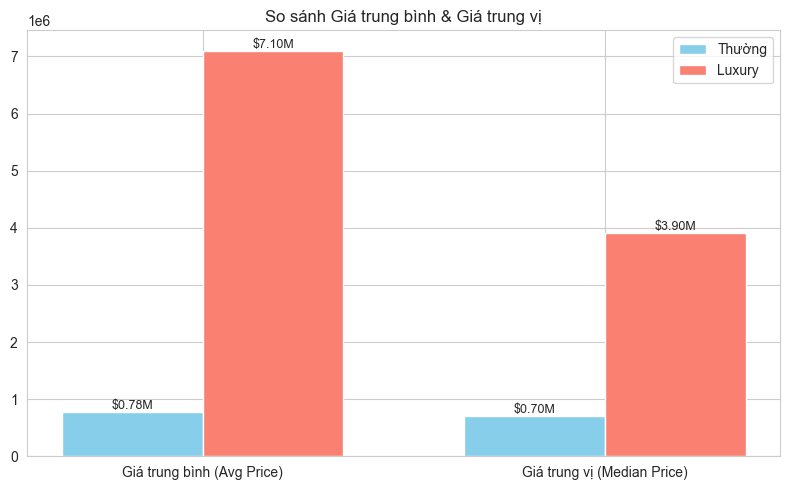

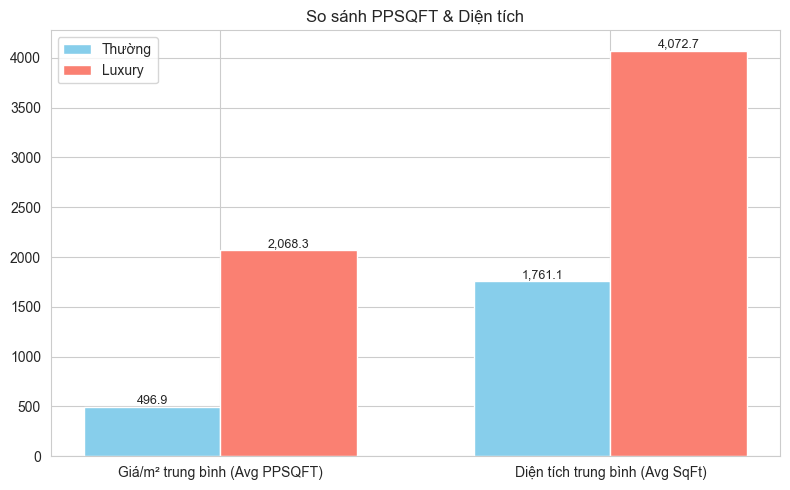

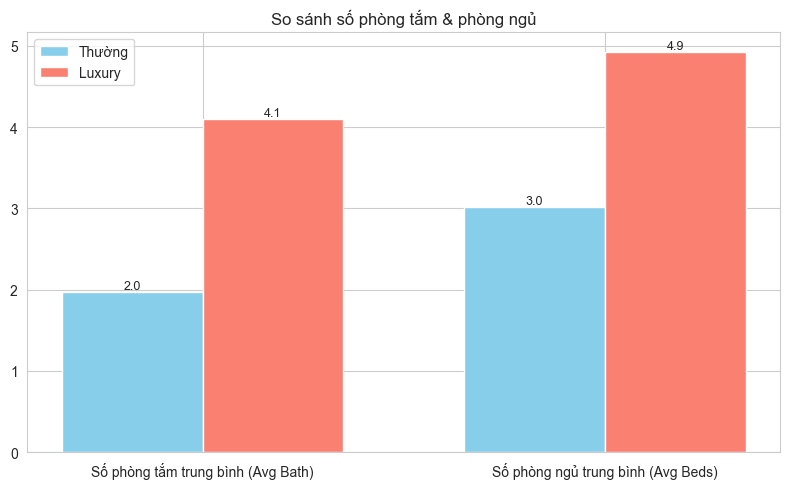

In [32]:
# Chuẩn bị dữ liệu numeric để dễ vẽ
numeric_df = pd.DataFrame({
    "Chỉ số": summary["Chỉ số"],
    "Thường": summary["Phân khúc Thường"],
    "Luxury": summary["Phân khúc Luxury"]
})

width = 0.35

# --- Biểu đồ 1: Avg Price & Median Price ---
df_price = numeric_df[numeric_df["Chỉ số"].isin([
    "Giá trung bình (Avg Price)",
    "Giá trung vị (Median Price)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_price))

ax.bar([i - width/2 for i in x], df_price["Thường"], width, label="Thường", color="skyblue")
ax.bar([i + width/2 for i in x], df_price["Luxury"], width, label="Luxury", color="salmon")

# Nhãn giá trị
for i, v in enumerate(df_price["Thường"]):
    ax.text(i - width/2, v, f"${v/1e6:.2f}M", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_price["Luxury"]):
    ax.text(i + width/2, v, f"${v/1e6:.2f}M", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_price["Chỉ số"])
ax.set_title("So sánh Giá trung bình & Giá trung vị")
ax.legend()
plt.tight_layout()
plt.show()


# --- Biểu đồ 2: PPSQFT & Diện tích ---
df_area = numeric_df[numeric_df["Chỉ số"].isin([
    "Giá/m² trung bình (Avg PPSQFT)",
    "Diện tích trung bình (Avg SqFt)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_area))

ax.bar([i - width/2 for i in x], df_area["Thường"], width, label="Thường", color="skyblue")
ax.bar([i + width/2 for i in x], df_area["Luxury"], width, label="Luxury", color="salmon")

for i, v in enumerate(df_area["Thường"]):
    ax.text(i - width/2, v, f"{v:,.1f}", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_area["Luxury"]):
    ax.text(i + width/2, v, f"{v:,.1f}", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_area["Chỉ số"])
ax.set_title("So sánh PPSQFT & Diện tích")
ax.legend()
plt.tight_layout()
plt.show()


# --- Biểu đồ 3: Bath & Beds ---
df_rooms = numeric_df[numeric_df["Chỉ số"].isin([
    "Số phòng tắm trung bình (Avg Bath)",
    "Số phòng ngủ trung bình (Avg Beds)"
])]
fig, ax = plt.subplots(figsize=(8,5))
x = range(len(df_rooms))

ax.bar([i - width/2 for i in x], df_rooms["Thường"], width, label="Thường", color="skyblue")
ax.bar([i + width/2 for i in x], df_rooms["Luxury"], width, label="Luxury", color="salmon")

for i, v in enumerate(df_rooms["Thường"]):
    ax.text(i - width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)
for i, v in enumerate(df_rooms["Luxury"]):
    ax.text(i + width/2, v, f"{v:.1f}", ha='center', va='bottom', fontsize=9)

ax.set_xticks(x)
ax.set_xticklabels(df_rooms["Chỉ số"])
ax.set_title("So sánh số phòng tắm & phòng ngủ")
ax.legend()
plt.tight_layout()
plt.show()


##  Giá bán  
- Luxury đắt **7.6x** thường, diện tích chỉ **1.8x** → khách hàng trả tiền cho **giá trị vô hình** (vị trí, tiện ích, thương hiệu, sang trọng).  

##  Giá/m² (PPSQFT)  
- Luxury cao hơn **4.3x** thường → giá trị mỗi m² phản ánh **đẳng cấp trên mỗi mét vuông**, không tỷ lệ thuận diện tích.  

##  Phòng tắm &  Phòng ngủ  
- Phòng tắm **1.8x**, phòng ngủ **1.4x** → Ưu tiên **tiện nghi cá nhân (bathroom)** quan trọng hơn khả năng chứa người (bedroom) trong phân khúc sang trọng.

##  Diện tích  
- Luxury lớn hơn **1.8x**, nhưng giá **7.6x** → diện tích chỉ là **một phần nhỏ**, yếu tố vô hình mới đẩy giá.  

##  Tóm lại  
Luxury = **diện tích + vị trí + tiện nghi + trải nghiệm sống đẳng cấp**, khiến khách hàng **sẵn sàng trả gấp nhiều lần**.  


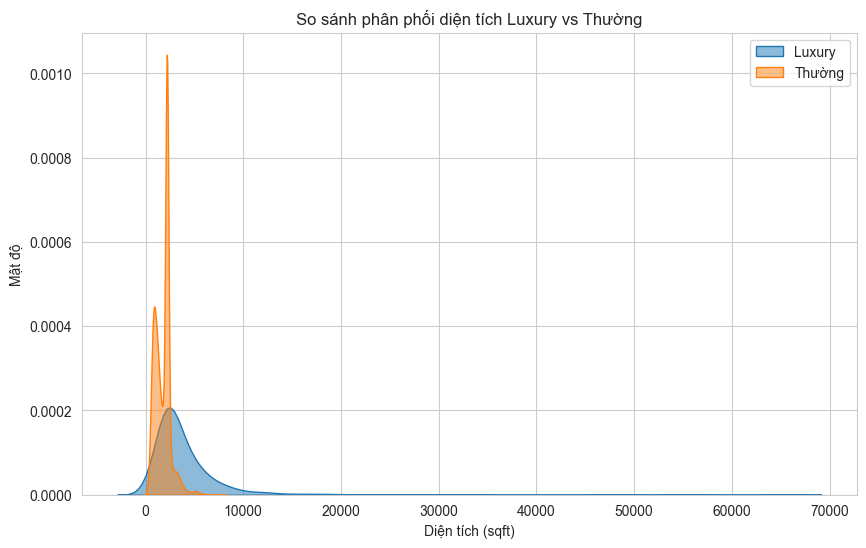

So sánh diện tích trung bình (PROPERTYSQFT) giữa Luxury và Thường
T-statistic: 14.11
P-value: 0.00000
Luxury có diện tích trung bình khác biệt đáng kể so với Thường (p < 0.05).


In [33]:
plt.figure(figsize=(10,6))
sns.kdeplot(df_luxury['PROPERTYSQFT'], label='Luxury', fill=True, alpha=0.5)
sns.kdeplot(df_normal['PROPERTYSQFT'], label='Thường', fill=True, alpha=0.5)
plt.xlabel('Diện tích (sqft)')
plt.ylabel('Mật độ')
plt.title('So sánh phân phối diện tích Luxury vs Thường')
plt.legend()
plt.show()

# --- Thực hiện t-test ---
t_stat, p_value = stats.ttest_ind(df_luxury['PROPERTYSQFT'], df_normal['PROPERTYSQFT'], equal_var=False)

print("So sánh diện tích trung bình (PROPERTYSQFT) giữa Luxury và Thường")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Luxury có diện tích trung bình khác biệt đáng kể so với Thường (p < 0.05).")
else:
    print("Không đủ bằng chứng để kết luận Luxury khác biệt diện tích so với Thường.")

In [34]:
def property_type_stats(df, name):
    counts = df['PROPERTY_TYPE'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['PROPERTY_TYPE'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_property = property_type_stats(df_normal, 'Standard')
lux_property = property_type_stats(df_luxury, 'Luxury')

property_compare = pd.concat([std_property, lux_property], axis=1).fillna(0)

print("📊 So sánh loại hình bất động sản (PROPERTY_TYPE):")
display(property_compare)


# 2️⃣ Phân bố địa lý theo BOROUGH
def borough_stats(df, name):
    counts = df['BOROUGH'].value_counts(normalize=True) * 100
    return pd.DataFrame({
        f'{name}_count': df['BOROUGH'].value_counts(),
        f'{name}_percent': counts.round(2)
    })

std_borough = borough_stats(df_normal, 'Standard')
lux_borough = borough_stats(df_luxury, 'Luxury')

borough_compare = pd.concat([std_borough, lux_borough], axis=1).fillna(0)

print("\n📍 So sánh theo BOROUGH:")
display(borough_compare)




📊 So sánh loại hình bất động sản (PROPERTY_TYPE):


,Standard_count,Standard_percent,Luxury_count,Luxury_percent
PROPERTY_TYPE,,,,
co op,1236,33.17,144.00,17.63
house,837,22.46,116.00,14.20
condo,621,16.67,222.00,27.17
multi family home,580,15.57,108.00,13.22
other,309,8.29,38.00,4.65
townhouse,107,2.87,180.00,22.03
land,35,0.94,9.00,1.10
mobile home,1,0.03,0.00,0.00



📍 So sánh theo BOROUGH:


,Standard_count,Standard_percent,Luxury_count,Luxury_percent
BOROUGH,,,,
Manhattan,2531,67.93,789.00,96.57
Queens,542,14.55,0.00,0.00
Brooklyn,419,11.25,28.00,3.43
Bronx,176,4.72,0.00,0.00
Staten Island,58,1.56,0.00,0.00


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3510488990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(small, 'Other')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3510488990.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(small, 'Other')


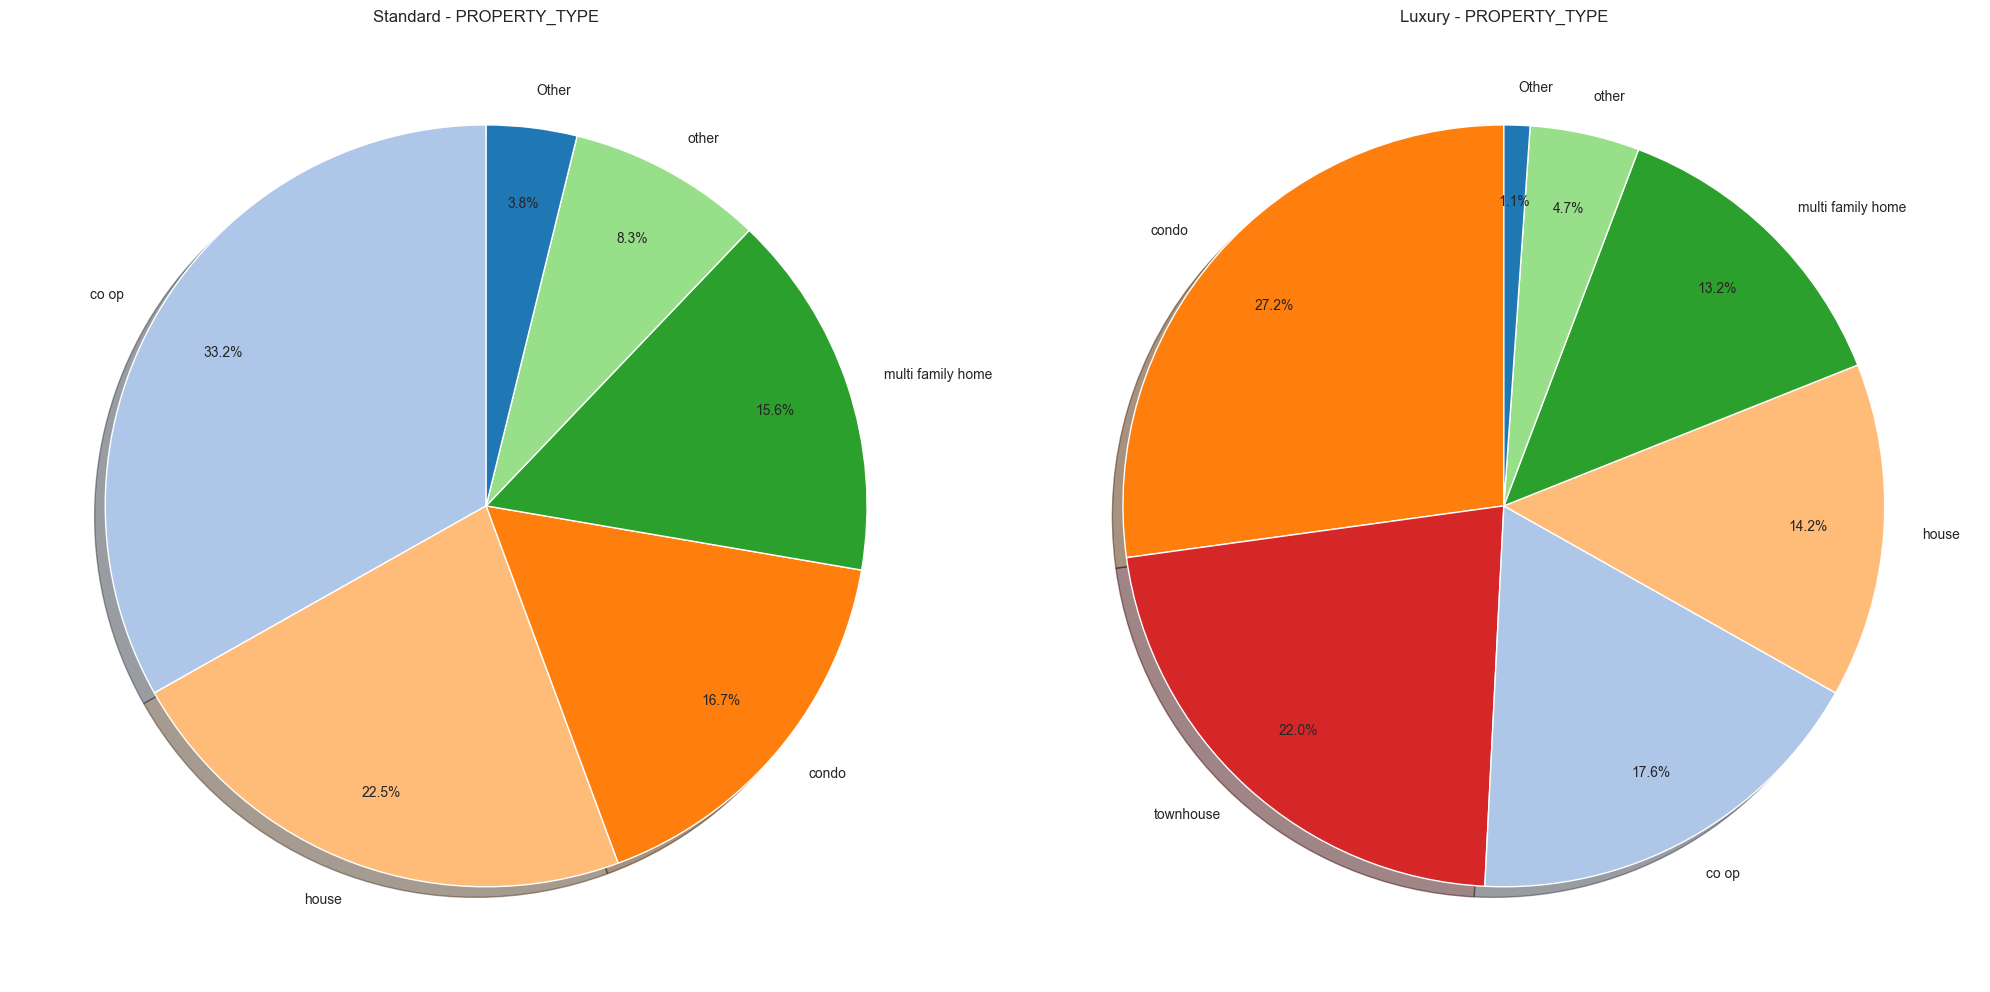

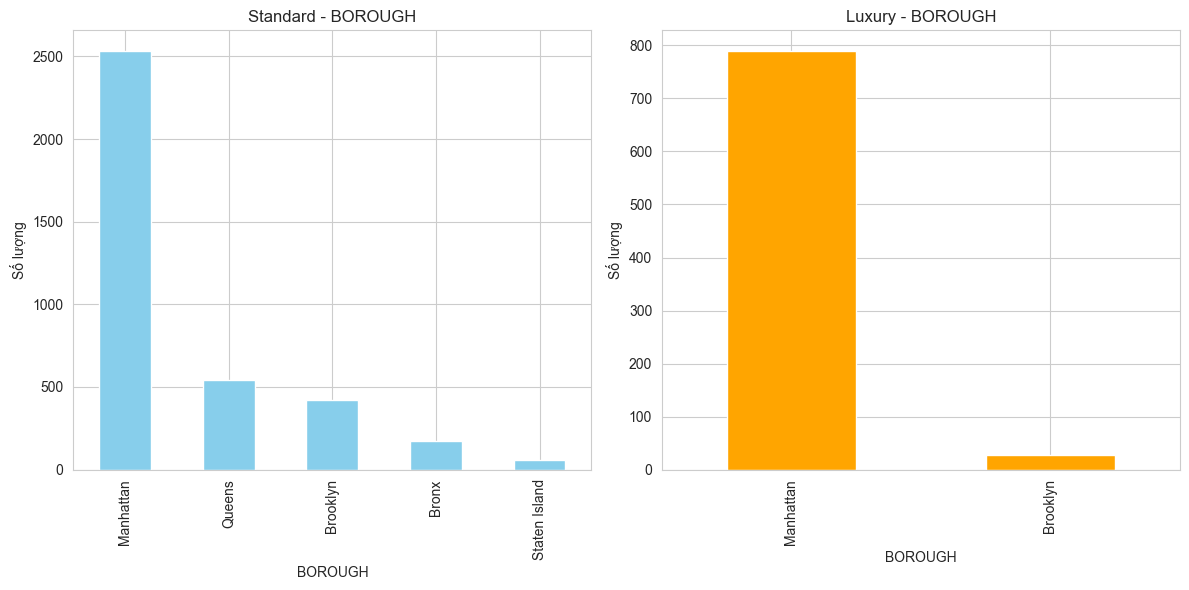

In [35]:
def group_small(df, column, threshold=0.03):
    counts = df[column].value_counts(normalize=True)
    small = counts[counts < threshold].index
    df[column] = df[column].replace(small, 'Other')
    return df

df_normal = group_small(df_normal, 'PROPERTY_TYPE')
df_luxury = group_small(df_luxury, 'PROPERTY_TYPE')

# Tạo màu cố định cho từng category
all_categories = sorted(list(set(df_normal['PROPERTY_TYPE'].unique()) | set(df_luxury['PROPERTY_TYPE'].unique())))
colors = plt.cm.tab20.colors  # lấy 20 màu chuẩn
color_dict = {cat: colors[i % len(colors)] for i, cat in enumerate(all_categories)}

# Hàm lọc hiển thị % >1%
def autopct_filter(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# Vẽ 2 pie chart cùng màu cho cùng category
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

df_normal_counts = df_normal['PROPERTY_TYPE'].value_counts()
df_normal_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[0],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_normal_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[0].set_title("Standard - PROPERTY_TYPE")
axes[0].set_ylabel("")

df_luxury_counts = df_luxury['PROPERTY_TYPE'].value_counts()
df_luxury_counts.plot.pie(
    autopct=autopct_filter,
    ax=axes[1],
    startangle=90,
    shadow=True,
    colors=[color_dict[i] for i in df_luxury_counts.index],
    labeldistance=1.1,
    pctdistance=0.8
)
axes[1].set_title("Luxury - PROPERTY_TYPE")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


# 2️⃣ BOROUGH
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
df_normal['BOROUGH'].value_counts().plot.bar(ax=axes[0], color='skyblue')
axes[0].set_title("Standard - BOROUGH")
axes[0].set_ylabel("Số lượng")

df_luxury['BOROUGH'].value_counts().plot.bar(ax=axes[1], color='orange')
axes[1].set_title("Luxury - BOROUGH")
axes[1].set_ylabel("Số lượng")

plt.tight_layout()
plt.show()




### 1. Loại hình bất động sản (PROPERTY_TYPE)
- **Normal**: chủ yếu là **Co-op (34.4%)** và **House (23.6%)** → lựa chọn truyền thống, phổ biến.  
- **Luxury**: thiên về **Condo (36.2%)** và **Townhouse (16.9%)**, cao gấp **3–5 lần tỷ trọng Normal**.  
- **Co-op** giảm mạnh (34.4% → 17.2%) vì không hợp gu khách hàng giàu, vốn ưu tiên **riêng tư & toàn quyền sở hữu**.  

👉 **Kết luận:** Normal = “nhà ở đại chúng” | Luxury = “căn hộ & townhouse sang trọng”.

---

### 2. Phân bố địa lý (BOROUGH)
- **Manhattan** áp đảo Luxury (**90.6% vs 67.7% Normal**) → trung tâm của bất động sản hạng sang.  
- **Queens** (15.3% → 1.0%) và **Bronx** (5.0% → 0.1%) gần như biến mất khỏi Luxury → sân chơi của thị trường tầm trung.  
- **Brooklyn** giữ vai trò trung gian (**10.3% vs 8.3%**) → có sức hút, nhưng chưa cạnh tranh được với Manhattan.  

👉 **Kết luận:** Luxury tập trung gần như tuyệt đối ở Manhattan; Normal phân bổ đa dạng hơn.

---

### 📌 Insight tổng hợp
Luxury không chỉ **“to hơn”** mà còn:  
- Ở **vị trí đẳng cấp hơn** (Manhattan)  
- Thuộc **loại hình khác biệt hơn** (Condo, Townhouse)  

=> **DNA của Luxury = Manhattan + Condo/Townhouse**  
Trong khi đó, Normal gắn với **Co-op/House** trải rộng ở nhiều quận.  


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\2220753960.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()


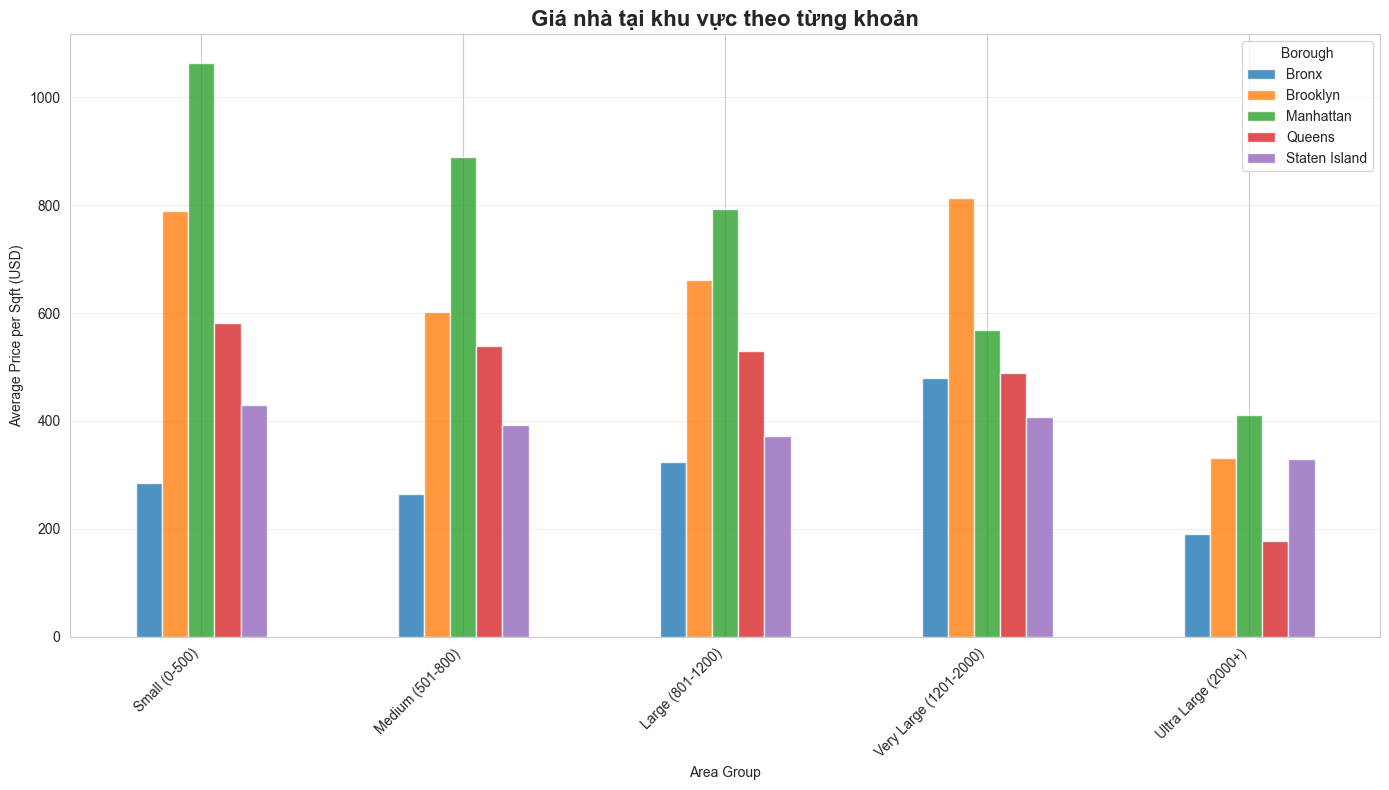

AreaGroup,Small (0-500),Medium (501-800),Large (801-1200),Very Large (1201-2000),Ultra Large (2000+)
BOROUGH,,,,,
Bronx,285.00,265.06,324.42,479.59,191.07
Brooklyn,789.19,600.96,661.69,812.19,332.14
Manhattan,"1,062.87",888.98,793.36,568.59,410.40
Queens,580.88,538.91,529.74,488.92,176.96
Staten Island,429.24,392.00,372.26,406.43,330.15


In [36]:

df_clean = df_normal.copy()

df_clean = df_clean.dropna(subset=['PRICE_PER_SQFT'])
df_clean = df_clean[df_clean['PRICE_PER_SQFT'] > 0]

df_clean['AreaGroup'] = pd.cut(
    df_clean['PROPERTYSQFT'],
    bins=[0, 500, 800, 1200, 2000, float('inf')],
    labels=['Small (0-500)', 'Medium (501-800)', 'Large (801-1200)', 
            'Very Large (1201-2000)', 'Ultra Large (2000+)']
)

price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

price_sqft_grouped.T.plot(kind='bar', figsize=(14, 8), alpha=0.8)

plt.title("Giá nhà tại khu vực theo từng khoản", fontsize=16, fontweight='bold')
plt.ylabel("Average Price per Sqft (USD)")
plt.xlabel("Area Group")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Borough")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

display(price_sqft_grouped.round(2))


Manhattan & Brooklyn là hai thị trường cao cấp nhất: Giá trên mỗi foot vuông ($/sqft) của hai quận này luôn cao nhất ở mọi phân khúc diện tích, phản ánh sức hút và sự cạnh tranh khốc liệt.

Quy luật "Giảm giá theo diện tích" (Discount for Bulk): Ở hầu hết các quận, căn càng lớn, giá mỗi sqft càng rẻ. Điều này cho thấy thị trường có "chiết khấu" khi mua diện tích lớn.

Ví dụ điển hình: Tại Manhattan, giá/sqft giảm ~33% từ nhóm "Small" ($644) xuống "Ultra Large" ($433).

Ngoại lệ đáng chú ý: The Bronx là quận DUY NHẤT có xu hướng ngược lại. Giá/sqft ở đây tăng mạnh ở các nhóm diện tích lớn. Điều này có thể do nguồn cung các bất động sản lớn, đẹp tại Bronx rất khan hiếm và có giá trị đầu tư cao, trong khi các căn nhỏ thường là các apartment cũ giá rẻ.

In [37]:
# Giá trung bình / sqft theo quận & nhóm diện tích
price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()

print("Average Price per Sqft by Borough and Area Group:")
print(price_sqft_grouped.round(2))

# Tính tỷ lệ % thay đổi giữa các nhóm diện tích
price_sqft_change = price_sqft_grouped.pct_change(axis=1) * 100

print("\nPercentage change compared to previous Area Group:")
print(price_sqft_change.fillna('-').round(1))


Average Price per Sqft by Borough and Area Group:
AreaGroup      Small (0-500)  Medium (501-800)  Large (801-1200)  \
BOROUGH                                                            
Bronx                 285.00            265.06            324.42   
Brooklyn              789.19            600.96            661.69   
Manhattan           1,062.87            888.98            793.36   
Queens                580.88            538.91            529.74   
Staten Island         429.24            392.00            372.26   

AreaGroup      Very Large (1201-2000)  Ultra Large (2000+)  
BOROUGH                                                     
Bronx                          479.59               191.07  
Brooklyn                       812.19               332.14  
Manhattan                      568.59               410.40  
Queens                         488.92               176.96  
Staten Island                  406.43               330.15  

Percentage change compared to previous Area G

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\683740668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_sqft_grouped = df_clean.groupby(['BOROUGH', 'AreaGroup'])['PRICE_PER_SQFT'].mean().unstack()


Co-op là lựa chọn tiết kiệm chi phí: Ở mọi phân khúc diện tích, Co-op luôn có giá trung bình thấp hơn Condo một cách rõ rệt. Điều này khẳng định đặc điểm của thị trường NYC: Co-op rẻ hơn nhưng đi kèm nhiều quy định chặt chẽ hơn.

Sự "lên ngôi" của nhà riêng (House) và Multi Family Home ở phân khúc lớn: Ở nhóm "Large" trở lên, giá của House và Multi Family Home tăng vọt và vượt qua Condo. Điều này cho thấy việc sở hữu một ngôi nhà nguyên căn hoặc một tòa nhà cho thuê (một dạng bất động sản đầu tư) ở NYC có giá trị rất lớn và là phân khúc của các nhà đầu tư hoặc gia đình giàu có.

In [39]:

# print("Average Price per Sqft by Borough and Area Group:")
# print(price_by_area_type.round(2))

# # Tính tỷ lệ % thay đổi giữa các nhóm diện tích
# price_sqft_change = price_by_area_type.pct_change(axis=1) * 100

# print("\nPercentage change compared to previous Area Group:")
# print(price_sqft_change.fillna('-').round(1))


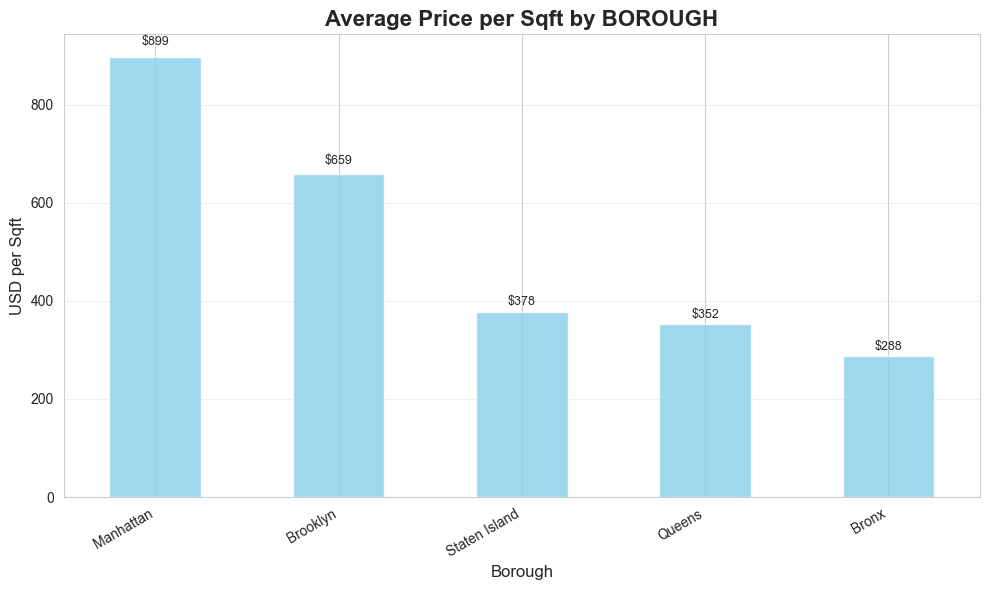

BOROUGH
Manhattan       898.58
Brooklyn        659.08
Staten Island   378.33
Queens          352.07
Bronx           288.40
Name: PRICE_PER_SQFT, dtype: float64


In [40]:
avg_price_sqft_by_borough = df.groupby('BOROUGH')['PRICE_PER_SQFT'].mean().sort_values(ascending=False)

# Vẽ bar chart
plt.figure(figsize=(10,6))
avg_price_sqft_by_borough.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Average Price per Sqft by BOROUGH", fontsize=16, fontweight='bold')
plt.ylabel("USD per Sqft", fontsize=12)
plt.xlabel("Borough", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)

# Thêm label giá trên cột
for i, val in enumerate(avg_price_sqft_by_borough):
    plt.text(i, val * 1.02, f"${val:,.0f}", ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# In bảng giá trung bình
print(avg_price_sqft_by_borough.round(2))


## 🔍 Insight chính
1. **Manhattan thống trị**: giá gấp 3.1 lần Bronx, gần gấp đôi Brooklyn → trung tâm luxury.  
2. **Brooklyn vươn lên premium**: nhiều khu giá tiệm cận Manhattan, hút giới trẻ & gia đình khá giả.  
3. **Khoảng cách lớn**: chênh lệch Manhattan – Bronx tới $610/sqft → phản ánh rõ phân tầng thu nhập & hạ tầng.  
4. **Ba quận ngoại vi (Queens, Bronx, Staten Island)** giá gần nhau ($288–378/sqft) → phù hợp người mua lần đầu.  
5. **Phân khúc rõ rệt**:  
   - Siêu cao cấp: Manhattan  
   - Cao cấp: Brooklyn  
   - Trung bình: Staten Island  
   - Bình dân: Queens & Bronx  

---

## 💡 Khuyến nghị
- **Đầu tư**: Brooklyn có tiềm năng tăng giá.  
- **Người mua ở**: nên xem Queens & Bronx.  
- **Phát triển dự án**: Staten Island là thị trường tiềm năng.

Có 96 giá trị diện tích xuất hiện từ 5 lần trở lên.
Top 10 diện tích phổ biến nhất:


,PROPERTYSQFT,COUNT
0,"2,184.21",1525
1,800.00,53
2,750.00,51
3,900.00,50
4,"1,200.00",47
5,"1,000.00",40
6,850.00,38
7,"1,100.00",38
8,"2,000.00",28
9,950.00,28


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1306940514.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_areas.head(15), x='PROPERTYSQFT', y='COUNT', palette="viridis")


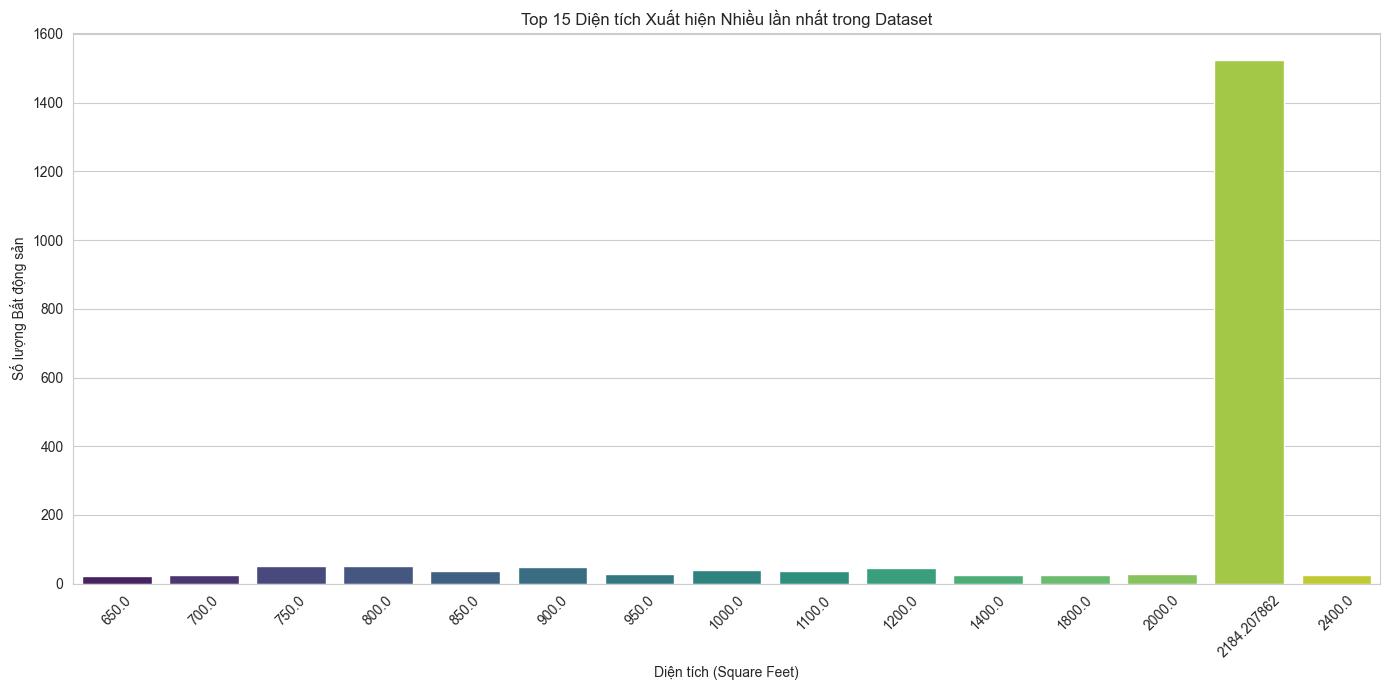

In [41]:
# Kiểm tra số lượng các giá trị diện tích trùng lặp
area_frequency = df['PROPERTYSQFT'].value_counts().reset_index()
area_frequency.columns = ['PROPERTYSQFT', 'COUNT']

# Lọc ra những diện tích xuất hiện nhiều lần (ví dụ: từ 5 lần trở lên)
common_areas = area_frequency[area_frequency['COUNT'] >= 5].sort_values('COUNT', ascending=False)

print(f"Có {len(common_areas)} giá trị diện tích xuất hiện từ 5 lần trở lên.")
print("Top 10 diện tích phổ biến nhất:")
display(common_areas.head(10))

# Vẽ biểu đồ để trực quan hóa
plt.figure(figsize=(14, 7))
sns.barplot(data=common_areas.head(15), x='PROPERTYSQFT', y='COUNT', palette="viridis")
plt.title('Top 15 Diện tích Xuất hiện Nhiều lần nhất trong Dataset')
plt.xlabel('Diện tích (Square Feet)')
plt.ylabel('Số lượng Bất động sản')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Chọn một diện tích phổ biến để phân tích sâu (ví dụ: 1000 sqft)
target_area = 2184.207862
cluster_df = df[df['PROPERTYSQFT'] == target_area].copy()

print(f"Phân tích sâu cho các bất động sản có diện tích chính xác {target_area} sqft")
print(f"Tổng số lượng: {len(cluster_df)}")
print("\n--- Phân bố theo LOẠI HÌNH (PROPERTY_TYPE) ---")
print(cluster_df['PROPERTY_TYPE'].value_counts())
print("\n--- Phân bố theo QUẬN ---")
print(cluster_df['BOROUGH'].value_counts())
print("\n--- Phân bố theo BROKER ---")
display(cluster_df['BROKERTITLE'].value_counts().head())

# Phân tích giá cho cụm này
print(f"\n--- Thống kê GIÁ cho cụm {target_area} sqft ---")
print(f"Giá trung bình: ${cluster_df['PRICE'].mean():,.0f}")
print(f"Giá trung vị: ${cluster_df['PRICE'].median():,.0f}")
print(f"Khoảng giá: ${cluster_df['PRICE'].min():,.0f} - ${cluster_df['PRICE'].max():,.0f}")

Phân tích sâu cho các bất động sản có diện tích chính xác 2184.207862 sqft
Tổng số lượng: 1525

--- Phân bố theo LOẠI HÌNH (PROPERTY_TYPE) ---
PROPERTY_TYPE
co op                713
house                254
multi family home    240
condo                113
other                101
townhouse             60
land                  43
mobile home            1
Name: count, dtype: int64

--- Phân bố theo QUẬN ---
BOROUGH
Manhattan        1140
Queens            269
Brooklyn           79
Bronx              34
Staten Island       3
Name: count, dtype: int64

--- Phân bố theo BROKER ---


BROKERTITLE
compass                 163
corcoran                149
douglas elliman         104
keller williams          87
brown harris stevens     79
Name: count, dtype: int64


--- Thống kê GIÁ cho cụm 2184.207862 sqft ---
Giá trung bình: $1,602,810
Giá trung vị: $750,000
Khoảng giá: $99,000 - $60,000,000


Phần lớn dữ liệu của bạn là các bất động sản lớn, hiếm có ở NYC. Chúng chủ yếu là Co-op ở Manhattan, với mức giá thực tế phổ biến nhất là khoảng $750,000. Tuy nhiên, do lẫn vào những bất động sản siêu sang có giá cả hàng chục triệu đô, nên giá trung bình bị đẩy lên tận $1.6 triệu và không phản ánh đúng giá trị "điển hình".



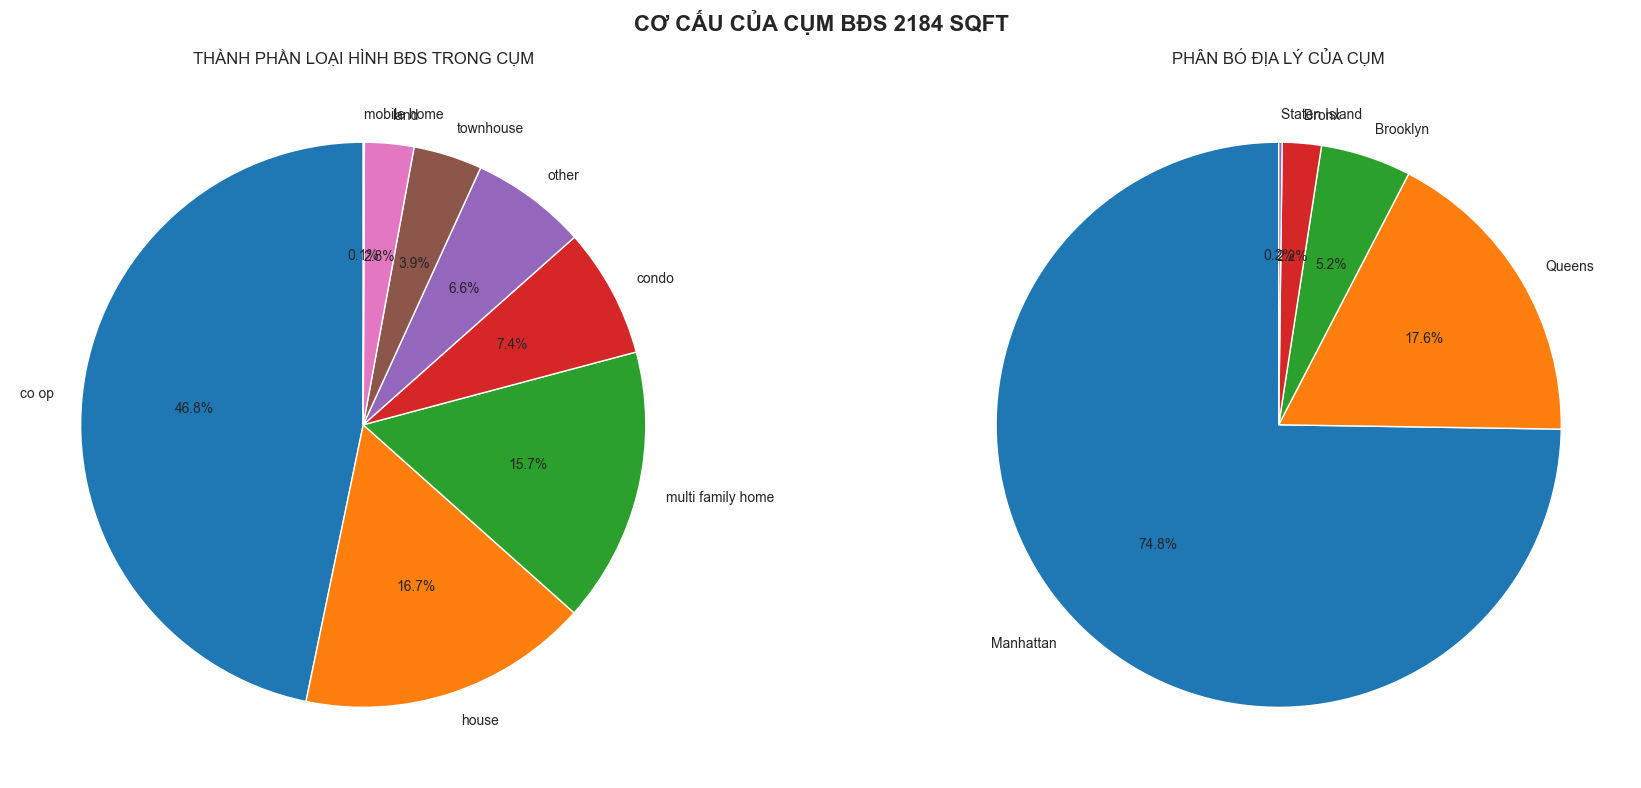

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart cho loại hình
prop_type_counts = cluster_df['PROPERTY_TYPE'].value_counts()
ax[0].pie(prop_type_counts.values, labels=prop_type_counts.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('THÀNH PHẦN LOẠI HÌNH BĐS TRONG CỤM')

# Pie chart cho phân bố địa lý
borough_counts = cluster_df['BOROUGH'].value_counts()
ax[1].pie(borough_counts.values, labels=borough_counts.index, autopct='%1.1f%%', startangle=90)
ax[1].set_title('PHÂN BỐ ĐỊA LÝ CỦA CỤM')

plt.suptitle('CƠ CẤU CỦA CỤM BĐS 2184 SQFT', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Manhattan thống trị phân khúc lớn: 75% (1140/1525) bất động sản trong nhóm diện tích "lỗi" này đến từ Manhattan. Điều này, dù là lỗi, nhưng cũng gián tiếp cho thấy Manhattan có nhiều bất động sản có diện tích lớn (những căn penthouse, duplex, hoặc townhouse được chia nhỏ) hơn các quận khác.

Co-op chiếm ưu thế: Trong nhóm này ở Manhattan, Co-op là loại hình phổ biến nhất (713 bản ghi). Điều này phù hợp với thực tế là các tòa nhà Co-op thường là những tòa nhà cũ, cổ điển có các căn hộ với mặt bằng sàn rộng.



In [44]:
weird_sqft_data = df[df['PROPERTYSQFT'] == 2184.207862]

# Hiển thị toàn bộ dữ liệu của các hàng này
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 
print(weird_sqft_data)
pd.reset_option('display.max_rows')  

                                            BROKERTITLE     PRICE  BEDS  BATH  \
3                             nest seekers  long island    325000     1     1   
4                                              du chris    230000     1     1   
7                                               e  corp    275000     1     1   
9                                  brown harris stevens    199900     1     1   
10                                 brown harris stevens    849000     1     1   
13                               monticello real estate    198000     1     1   
20                                             corcoran    550000     1     1   
22                                              compass   2250000     1     1   
23                                            sotheby's    269000     1     1   
24                                              compass    399000     1     1   
29                                   prime  long island    299000     1     1   
35                          

## 🔑 Kết luận tổng thể

1. **Giá trị Luxury không nằm ở diện tích**  
   - Dù Luxury có diện tích lớn hơn, nhưng phần chênh lệch giá chủ yếu đến từ **vị trí đắc địa, tầm view, tiện ích, thương hiệu và trải nghiệm sống**.  
   - Người mua Luxury trả tiền cho **lối sống** hơn là cho “ft² sàn”.

2. **Phòng tắm quan trọng hơn phòng ngủ**  
   - Luxury có số phòng tắm nhiều hơn rõ rệt, trong khi số phòng ngủ không tăng nhiều.  
   - Điều này cho thấy giới thượng lưu ưu tiên **tiện nghi cá nhân, sự riêng tư** hơn khả năng chứa nhiều người.

3. **Loại hình bất động sản khác biệt**  
   - **Standard** phổ biến với **Co-op và House** → lựa chọn truyền thống, đại chúng.  
   - **Luxury** thiên về **Condo cao cấp và Townhouse** → phù hợp phong cách sống hiện đại, sang trọng.

4. **Phân bố địa lý rõ ràng**  
   - **Manhattan** là “thủ phủ” của Luxury, chiếm gần như tuyệt đối.  
   - **Brooklyn** nổi lên như thị trường tiềm năng, thu hút người có thu nhập cao nhưng chưa chạm đến Manhattan.  
   - Các quận còn lại (Queens, Bronx, Staten Island) chủ yếu vẫn thuộc thị trường Standard.

5. **Giá trên mỗi ft² là thước đo đẳng cấp**  
   - Giá/ft² Luxury cao gấp nhiều lần Standard, khẳng định giá trị **không tỷ lệ thuận với diện tích**.  
   - Mỗi khu vực có “premium” riêng, phản ánh sức hút và mức sẵn sàng chi trả của thị trường.


## Ứng Dụng Thực Tế Từ Insight Bất Động Sản

### 1. Đối với Nhà Đầu tư & Người Mua Nhà
- **Định hướng đầu tư:**
  - **An toàn, thanh khoản cao** → chọn **Nornal** (Co-op, House) ở **Brooklyn, Queens**. Thị trường đại chúng, ít biến động, dễ mua bán.  
  - **Lợi nhuận cao, chấp nhận rủi ro** → nhắm **Condo cao cấp** ở **Manhattan**. Giá biến động lớn, tiềm năng tăng nhờ vị trí + thương hiệu.  

- **Quyết định mua thông minh:**
  - **Đừng chỉ nhìn diện tích:** 100m² ở Manhattan đắt gấp 3–4 lần Queens → ngân sách **ưu tiên vị trí hơn diện tích**.  
  - **Ưu tiên phòng tắm:** Nhà 3 phòng ngủ + 3 phòng tắm có giá trị hơn 4 phòng ngủ + 2 phòng tắm → dễ cho thuê/bán.  

---

### 2. Đối với Nhà Môi giới & Chủ Đầu tư
- **Chiến lược marketing:**
  - **Luxury** → nhấn mạnh **view, tiện ích (pool, gym, bảo vệ 24/7), địa chỉ đắc địa** → bán “lối sống”.  
  - **Normal** → tập trung vào **giá trị thực, công năng, tiết kiệm chi phí**.  




## 2.2. Multivariate Analysis

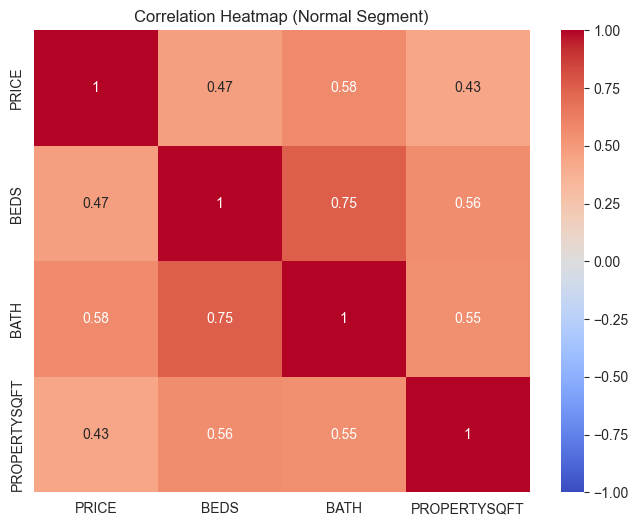

In [45]:
numeric_cols = ['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT']
df_numeric = df_normal[numeric_cols].dropna()

# Tính ma trận tương quan
corr_matrix = df_numeric.corr()

# Vẽ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap (Normal Segment)')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\2020753829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)


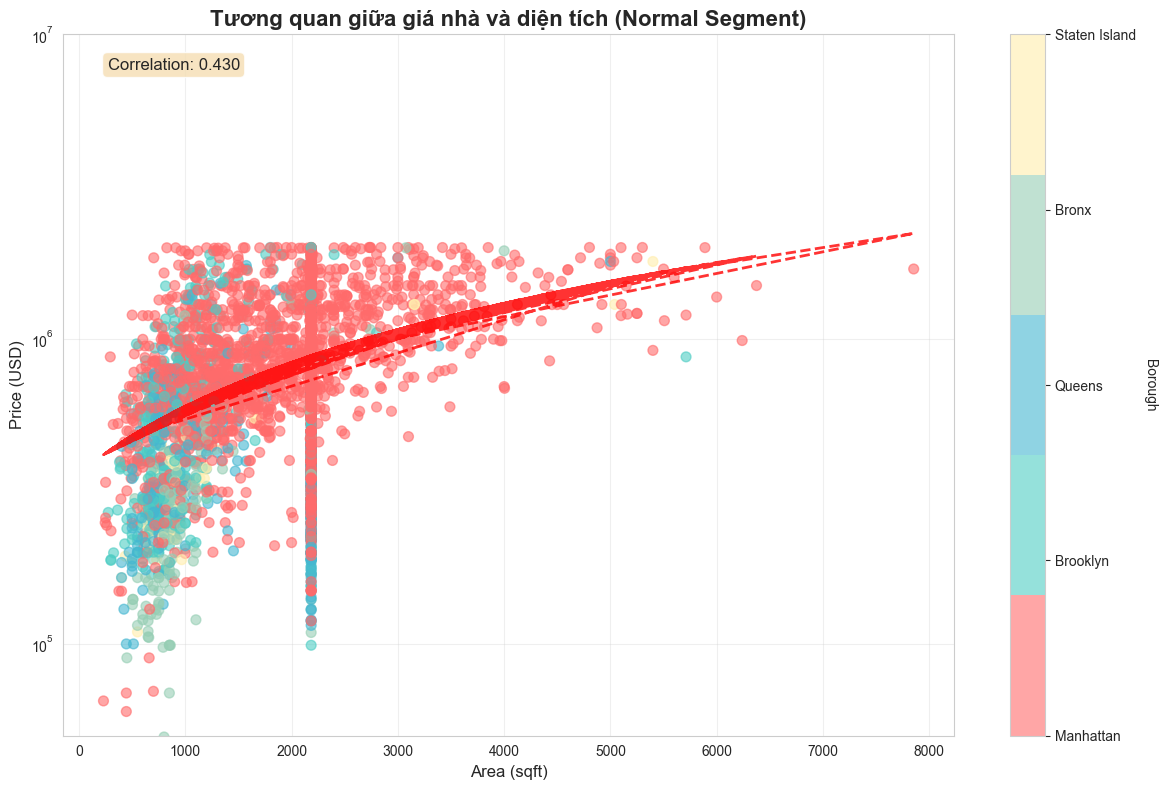

In [46]:
import matplotlib.colors  
borough_mapping = {'Manhattan': 0, 'Brooklyn': 1, 'Queens': 2, 'Bronx': 3, 'Staten Island': 4}
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD']  # Màu cố định

df_normal['BOROUGH_CODE'] = df_normal['BOROUGH'].map(borough_mapping)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_normal['PROPERTYSQFT'], df_normal['PRICE'], alpha=0.6, 
                      c=df_normal['BOROUGH_CODE'], cmap=matplotlib.colors.ListedColormap(colors), s=50)

# Thêm đường xu hướng
z = np.polyfit(df_normal['PROPERTYSQFT'], df_normal['PRICE'], 1)
p = np.poly1d(z)
plt.plot(df_normal['PROPERTYSQFT'], p(df_normal['PROPERTYSQFT']), "r--", alpha=0.8, linewidth=2)

# Thêm hệ số tương quan
correlation = df_normal[['PROPERTYSQFT', 'PRICE']].corr().iloc[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))

# Thêm colorbar với nhãn rời rạc
cbar = plt.colorbar(scatter, ticks=range(len(borough_mapping)))
cbar.set_ticklabels(list(borough_mapping.keys()))
cbar.set_label('Borough', rotation=270, labelpad=15)

plt.title('Tương quan giữa giá nhà và diện tích (Normal Segment)', fontsize=16, fontweight='bold')
plt.xlabel('Area (sqft)', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.yscale('log')
plt.ylim(50000, 10000000)
plt.grid(True, alpha=0.3)
plt.tight_layout()  
plt.show()

In [47]:
import statsmodels.api as sm

X_lux = sm.add_constant(df_luxury['PROPERTYSQFT'])
y_lux = df_luxury['PRICE']
model_lux = sm.OLS(y_lux, X_lux).fit()

print("=== Luxury ===")
print(model_lux.summary())

coef_sqft_lux = model_lux.params['PROPERTYSQFT']
print(f"Luxury: Mỗi 1 sqft tăng, giá tăng khoảng ${coef_sqft_lux:,.2f}\n")


=== Luxury ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     80.17
Date:                Wed, 17 Sep 2025   Prob (F-statistic):           2.29e-18
Time:                        09:02:10   Log-Likelihood:                -14310.
No. Observations:                 817   AIC:                         2.862e+04
Df Residuals:                     815   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          4.42e+06   4.55e+0

In [48]:

X_std = sm.add_constant(df_normal['PROPERTYSQFT'])
y_std = df_normal['PRICE']
model_std = sm.OLS(y_std, X_std).fit()

print("=== Standard ===")
print(model_std.summary())

coef_sqft_std = model_std.params['PROPERTYSQFT']
print(f"Standard: Mỗi 1 sqft tăng, giá tăng khoảng ${coef_sqft_std:,.2f}")


=== Standard ===
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     844.1
Date:                Wed, 17 Sep 2025   Prob (F-statistic):          1.87e-167
Time:                        09:02:10   Log-Likelihood:                -53386.
No. Observations:                3726   AIC:                         1.068e+05
Df Residuals:                    3724   BIC:                         1.068e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.634e+05   1.58e

## Phân tích Hồi quy: Ảnh hưởng của Diện tích đến Giá Nhà

### 1. Luxury Segment
- **Intercept (const) ≈ $3,139,000** → mức giá cơ bản ngay cả khi diện tích = 0.  
- **Hệ số PROPERTYSQFT ≈ $774.34** → mỗi 1 sqft tăng, giá tăng trung bình **$774**.  
- **R² = 0.127** → diện tích chỉ giải thích ~12.7% biến động giá.  
  → Ngoài diện tích, **vị trí, tiện nghi, view, thương hiệu** quyết định phần lớn giá Luxury.  

### 2. Standard Segment
- **Hệ số PROPERTYSQFT ≈ $242.50** → mỗi 1 sqft tăng, giá tăng trung bình **$243**.  
- **R² cao hơn Luxury** → giá Standard phụ thuộc diện tích nhiều hơn, ít chịu ảnh hưởng của yếu tố “premium”.  

### 3. So sánh & Insight
- **Luxury: $774/sqft vs Standard: $243/sqft** → Luxury trả gấp ~3 lần cho diện tích.  
- **Standard**: quan hệ diện tích–giá **đơn giản, dễ dự báo**.  
- **Luxury**: diện tích chỉ là 1 phần, giá còn chịu tác động mạnh từ **vị trí & tiện ích cao cấp**.  

💡 **Kết luận:** Người mua **Luxury** trả nhiều hơn cho diện tích, nhưng thực chất họ đang trả cho **lifestyle & giá trị vô hình**. Trong khi đó, người mua **Standard** tập trung vào **diện tích & công năng sử dụng**.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\889349862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])


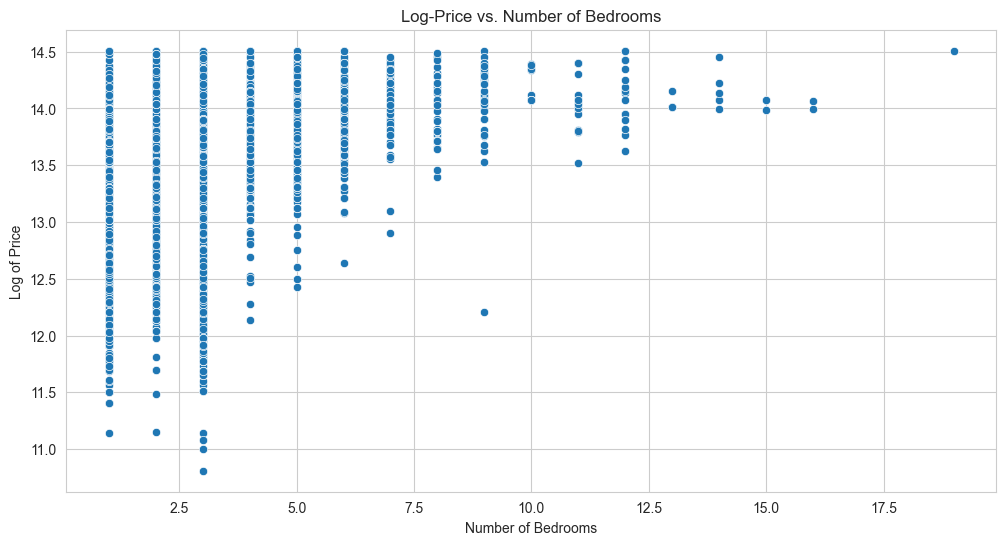

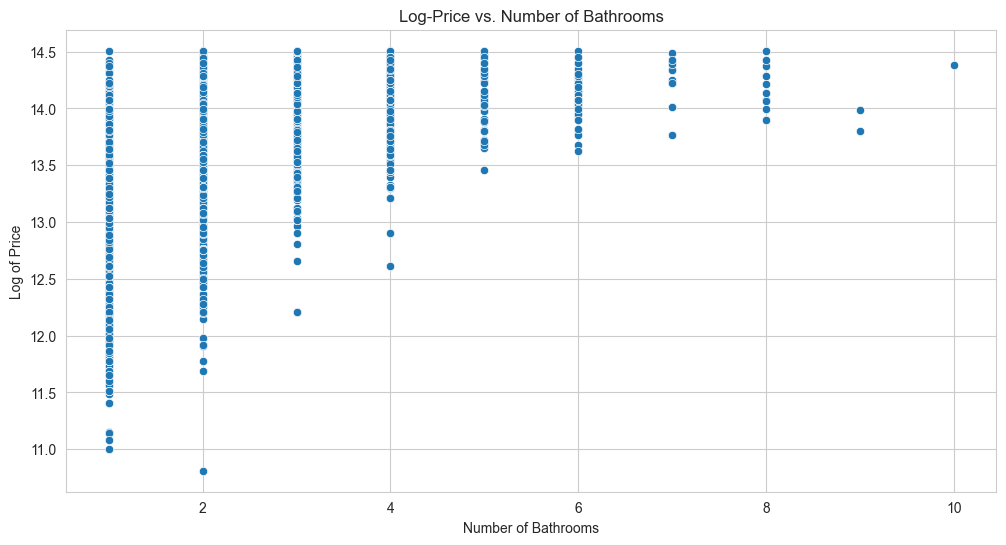

0.4616864977334096 0.5621068162897684


In [49]:
df_normal['LOG_PRICE'] = np.log(df_normal['PRICE'])

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BEDS', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Log of Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='BATH', y='LOG_PRICE', data=df_normal)
plt.title('Log-Price vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log of Price')
plt.show()

beds_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BEDS'])
bath_log_price_corr = df_normal['LOG_PRICE'].corr(df_normal['BATH'])

print(beds_log_price_corr, bath_log_price_corr)

In [50]:
import plotly.express as px

fig1 = px.scatter(df_normal, x='BEDS', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BEDS': 'Number of Bedrooms'},
                  title='Price vs. Number of Bedrooms')
fig1.show()

fig2 = px.scatter(df_normal, x='BATH', y='PRICE', 
                  trendline='ols', 
                  labels={'PRICE': 'Price', 'BATH': 'Number of Bathrooms'},
                  title='Price vs. Number of Bathrooms')
fig2.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




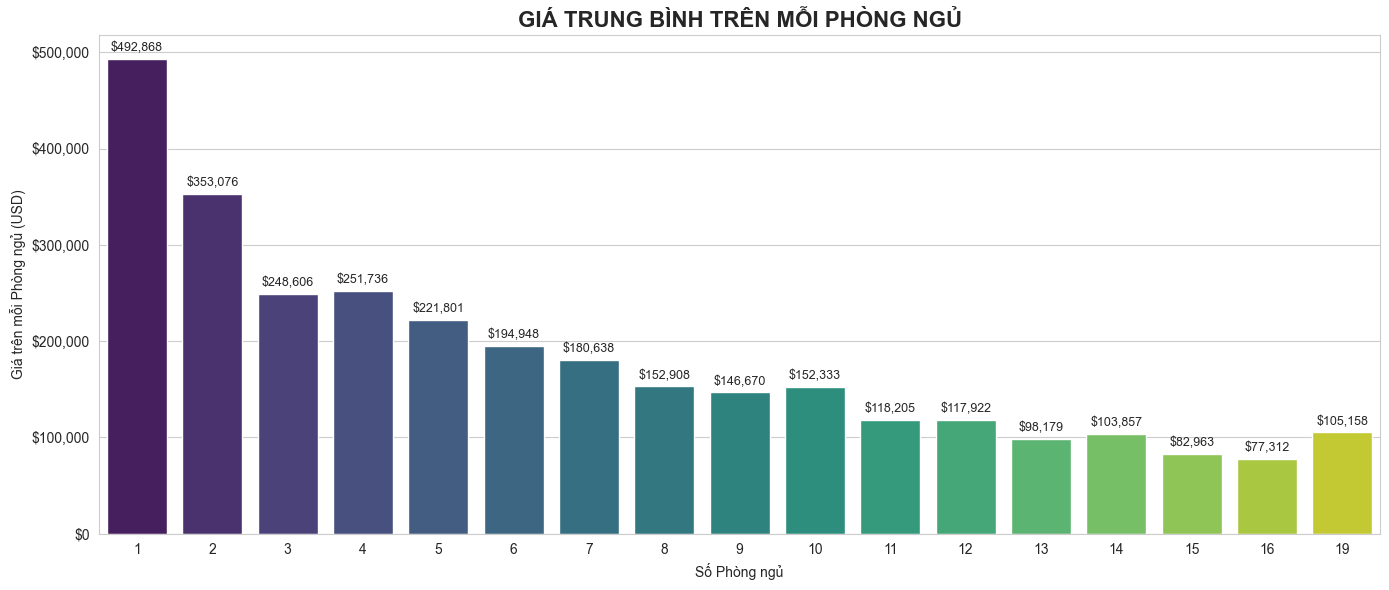

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:45: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\3084911784.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




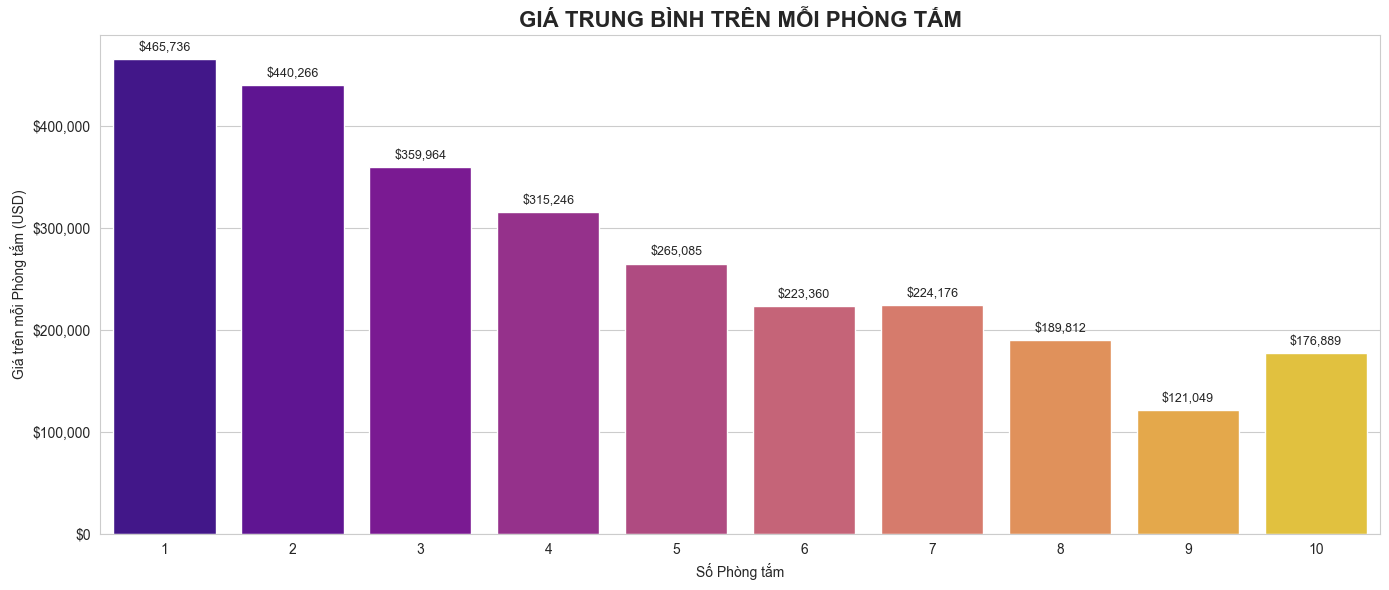

BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ:


,BEDS,PRICE_PER_BED
0,1,"492,867.85"
1,2,"353,075.76"
2,3,"248,605.82"
3,4,"251,736.35"
4,5,"221,801.25"
5,6,"194,947.71"
6,7,"180,638.29"
7,8,"152,907.65"
8,9,"146,670.36"
9,10,"152,333.30"



BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM:


,BATH,PRICE_PER_BATH
0,1,"465,736.19"
1,2,"440,265.78"
2,3,"359,964.10"
3,4,"315,245.85"
4,5,"265,085.32"
5,6,"223,359.58"
6,7,"224,175.82"
7,8,"189,812.50"
8,9,"121,049.33"
9,10,"176,888.80"


In [51]:

df_analysis = df_normal.copy()

# --- Tính toán giá TRÊN MỖI PHÒNG ---
# Lọc bỏ các dòng có số phòng bằng 0 để tránh lỗi chia cho 0
df_analysis = df_analysis[df_analysis['BEDS'] > 0]
df_analysis = df_analysis[df_analysis['BATH'] > 0]

# Tạo cột mới: Giá trên mỗi phòng ngủ và mỗi phòng tắm
df_analysis['PRICE_PER_BED'] = df_analysis['PRICE'] / df_analysis['BEDS']
df_analysis['PRICE_PER_BATH'] = df_analysis['PRICE'] / df_analysis['BATH']

# --- Bar plot: Giá TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ ---
plt.figure(figsize=(14, 6))

# Nhóm dữ liệu theo số phòng ngủ và tính giá trung bình TRÊN MỖI PHÒNG
price_per_bed = df_analysis.groupby('BEDS')['PRICE_PER_BED'].mean().reset_index()

# Vẽ biểu đồ
ax = sns.barplot(x='BEDS', y='PRICE_PER_BED', data=price_per_bed, palette='viridis', ci=None)
plt.title("GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ", fontsize=16, fontweight='bold')
plt.xlabel("Số Phòng ngủ")
plt.ylabel("Giá trên mỗi Phòng ngủ (USD)")

# Định dạng trục Y thành tiền tệ
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Thêm giá tiền trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Bar plot: Giá TRUNG BÌNH TRÊN MỖI PHÒNG TẮM ---
plt.figure(figsize=(14, 6))

# Nhóm dữ liệu theo số phòng tắm và tính giá trung bình TRÊN MỖI PHÒNG
price_per_bath = df_analysis.groupby('BATH')['PRICE_PER_BATH'].mean().reset_index()

# Vẽ biểu đồ
ax = sns.barplot(x='BATH', y='PRICE_PER_BATH', data=price_per_bath, palette='plasma', ci=None)
plt.title("GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM", fontsize=16, fontweight='bold')
plt.xlabel("Số Phòng tắm")
plt.ylabel("Giá trên mỗi Phòng tắm (USD)")

# Định dạng trục Y thành tiền tệ
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Thêm giá tiền trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- IN RA BẢNG SỐ LIỆU ĐỂ PHÂN TÍCH SÂU HƠN ---
print("BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ:")
display(price_per_bed.round(2))

print("\nBẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM:")
display(price_per_bath.round(2))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




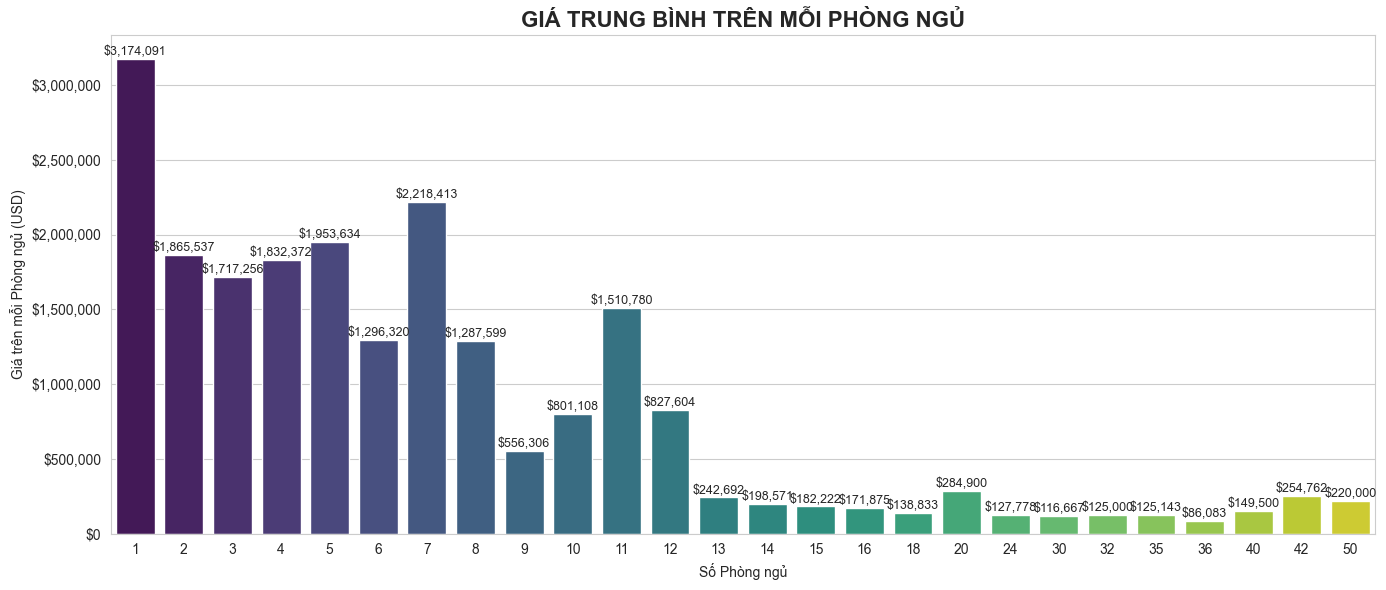

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:45: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\847793766.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




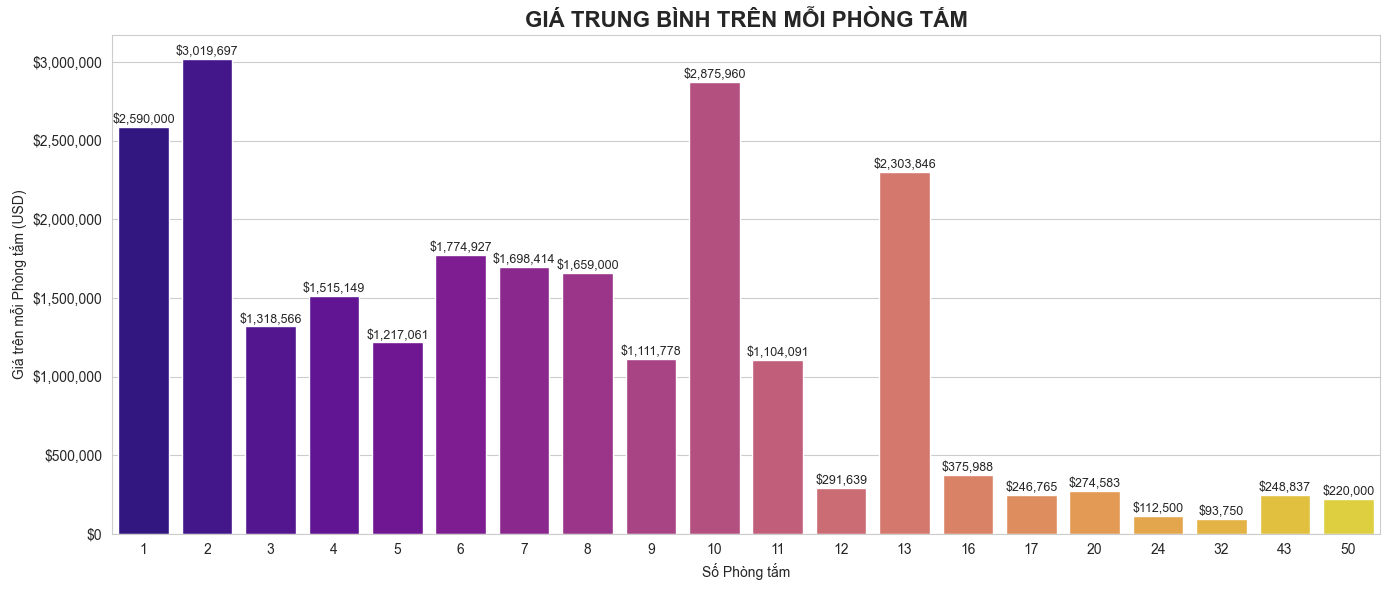

BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ:


,BEDS,PRICE_PER_BED
0,1,"3,174,090.91"
1,2,"1,865,537.37"
2,3,"1,717,255.58"
3,4,"1,832,372.21"
4,5,"1,953,634.47"
5,6,"1,296,320.07"
6,7,"2,218,413.11"
7,8,"1,287,599.36"
8,9,"556,305.56"
9,10,"801,107.69"



BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM:


,BATH,PRICE_PER_BATH
0,1,"2,590,000.00"
1,2,"3,019,696.69"
2,3,"1,318,565.97"
3,4,"1,515,148.92"
4,5,"1,217,060.82"
5,6,"1,774,927.37"
6,7,"1,698,414.29"
7,8,"1,659,000.00"
8,9,"1,111,777.76"
9,10,"2,875,960.00"


In [52]:

df_analysis = df_luxury.copy()

# --- Tính toán giá TRÊN MỖI PHÒNG ---
# Lọc bỏ các dòng có số phòng bằng 0 để tránh lỗi chia cho 0
df_analysis = df_analysis[df_analysis['BEDS'] > 0]
df_analysis = df_analysis[df_analysis['BATH'] > 0]

# Tạo cột mới: Giá trên mỗi phòng ngủ và mỗi phòng tắm
df_analysis['PRICE_PER_BED'] = df_analysis['PRICE'] / df_analysis['BEDS']
df_analysis['PRICE_PER_BATH'] = df_analysis['PRICE'] / df_analysis['BATH']

# --- Bar plot: Giá TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ ---
plt.figure(figsize=(14, 6))

# Nhóm dữ liệu theo số phòng ngủ và tính giá trung bình TRÊN MỖI PHÒNG
price_per_bed = df_analysis.groupby('BEDS')['PRICE_PER_BED'].mean().reset_index()

# Vẽ biểu đồ
ax = sns.barplot(x='BEDS', y='PRICE_PER_BED', data=price_per_bed, palette='viridis', ci=None)
plt.title("GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ", fontsize=16, fontweight='bold')
plt.xlabel("Số Phòng ngủ")
plt.ylabel("Giá trên mỗi Phòng ngủ (USD)")

# Định dạng trục Y thành tiền tệ
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Thêm giá tiền trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- Bar plot: Giá TRUNG BÌNH TRÊN MỖI PHÒNG TẮM ---
plt.figure(figsize=(14, 6))

# Nhóm dữ liệu theo số phòng tắm và tính giá trung bình TRÊN MỖI PHÒNG
price_per_bath = df_analysis.groupby('BATH')['PRICE_PER_BATH'].mean().reset_index()

# Vẽ biểu đồ
ax = sns.barplot(x='BATH', y='PRICE_PER_BATH', data=price_per_bath, palette='plasma', ci=None)
plt.title("GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM", fontsize=16, fontweight='bold')
plt.xlabel("Số Phòng tắm")
plt.ylabel("Giá trên mỗi Phòng tắm (USD)")

# Định dạng trục Y thành tiền tệ
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Thêm giá tiền trên cột
for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width()/2,
            y=height + 5000,
            s=f"${height:,.0f}",
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# --- IN RA BẢNG SỐ LIỆU ĐỂ PHÂN TÍCH SÂU HƠN ---
print("BẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG NGỦ:")
display(price_per_bed.round(2))

print("\nBẢNG GIÁ TRUNG BÌNH TRÊN MỖI PHÒNG TẮM:")
display(price_per_bath.round(2))

In [53]:
# Tính giá trung bình theo số phòng ngủ và phòng tắm
avg_price_by_beds = df.groupby('BEDS')['PRICE'].mean()
avg_price_by_bath = df.groupby('BATH')['PRICE'].mean()

# In ra kết quả giống ví dụ trước
print("Average Price by Number of Bedrooms:")
print(avg_price_by_beds.round(2))

print("\nAverage Price by Number of Bathrooms:")
display(avg_price_by_bath.round(2))


Average Price by Number of Bedrooms:
BEDS
1       530,973.09
2     1,049,018.88
3     1,451,407.88
4     2,710,976.63
5     4,072,708.92
6     3,423,657.62
7     6,852,592.79
8     5,593,925.57
9     2,096,184.16
10    5,539,555.43
11    5,129,838.80
12    3,118,299.85
13    2,027,800.00
14    1,675,000.00
15    2,137,777.40
16    1,993,500.00
18    2,499,000.00
19    1,998,000.00
20    5,698,000.00
24    3,066,666.67
30    3,500,000.00
32    4,000,000.00
35    4,380,000.00
36    3,099,000.00
40    5,980,000.00
42   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

Average Price by Number of Bathrooms:


BATH
1       473,096.77
2     1,700,757.45
3     1,707,340.79
4     3,488,254.47
5     3,249,632.40
6     7,593,804.76
7     6,056,043.48
8     9,991,953.49
9     7,458,412.43
10   27,072,680.50
11   12,145,000.00
12    3,499,666.67
13   29,950,000.00
16    6,015,800.00
17    4,195,000.00
20    5,491,666.67
24    2,700,000.00
32    3,000,000.00
43   10,700,000.00
50   11,000,000.00
Name: PRICE, dtype: float64

## 📊 Insight về Ảnh hưởng của BEDS & BATH đến Giá Nhà

---

### 🔹 Insight 1: Phòng tắm (BATH) quan trọng hơn Phòng ngủ (BEDS)
- **1 → 2 phòng tắm**: giá tăng từ **$473K → $1.7M** (~+260%).  
- **1 → 2 phòng ngủ**: giá tăng từ **$530K → $1.05M** (~+100%).  

👉 Thị trường trả premium lớn hơn cho **tiện nghi & riêng tư** → phòng tắm là yếu tố định giá mạnh.

---

### 🔹 Insight 2: Quy luật “Lợi tức giảm dần” (Diminishing Returns)
- **BEDS**: tăng đến 4 phòng ngủ thì hợp lý, sau đó biến động thất thường → nhu cầu >4 phòng ngủ thấp, không ổn định.  
- **BATH**: giá vẫn tăng đều tới 10 phòng tắm (~$27M) → với phân khúc siêu sang, phòng tắm vẫn tạo giá trị.

---

### 🔹 Insight 3: Ba phân khúc thị trường rõ ràng
1. **Phổ thông**: 1–2 BEDS, 1–2 BATH → < $1.7M.  
2. **Trung & Cao cấp**: 3–4 BEDS, 3–4 BATH → $1.4M – $3.5M.  
3. **Siêu sang**: 5+ BEDS, 5+ BATH → $3.2M – $30M.  
   - Biến động rất cao, giá phụ thuộc vào **vị trí, view, thương hiệu** hơn là số phòng.

---

### 🔹 Insight 4: “Đuôi dài” đặc thù của NYC
- Tồn tại nhà có **10, 20, thậm chí 50 phòng tắm**.  
- Đây là dấu hiệu của **thị trường siêu cao cấp** (penthouse, dinh thự, khách sạn cải tạo).

---

### 💡 Ứng dụng & Khuyến nghị
- **Người bán / Nhà phát triển**:  
  - Đầu tư vào **phòng tắm** hơn là thêm phòng ngủ.  
  - Cải tạo nên ưu tiên thêm **bathroom** để tăng giá trị.  

- **Người mua / Nhà đầu tư**:  
  - < $1.7M → tập trung vào 1–2 BEDS, 1–2 BATH (thanh khoản cao).  
  - $1.5M – $3.5M → tối ưu 3–4 BEDS, 3–4 BATH.  
  - Cẩn trọng với phân khúc **siêu sang** (5+ BEDS/BATH) vì giá biến động mạnh.  

- **Môi giới BĐS**:  
  - Marketing cần **nhấn mạnh số phòng tắm** ngang hoặc hơn số phòng ngủ.  
  - Giúp khách hàng hiểu rõ quy luật **diminishing returns** để đặt kỳ vọng giá hợp lý.


In [54]:

average_price_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].mean().sort_values(ascending=False)

total_listings_per_broker = df_normal['BROKERTITLE'].value_counts()

price_range_per_broker = df_normal.groupby('BROKERTITLE')['PRICE'].agg(['min', 'max', 'median']).sort_values(by='median', ascending=False)

# Displaying the results
print("Các nhà môi giới có giá niêm yết trung vị cao nhất:")
print(price_range_per_broker.head())

print("\nCác nhà môi giới có giá niêm yết trung bình cao nhất:")
print(average_price_per_broker.head())

print("\nCác nhà môi giới có nhiều niêm yết nhất:")
print(total_listings_per_broker.head())

Các nhà môi giới có giá niêm yết trung vị cao nhất:
                  min      max       median
BROKERTITLE                                
brick mortar  1995000  1995000 1,995,000.00
excellent      468000  1990000 1,990,000.00
ubiq ny ltd   1990000  1990000 1,990,000.00
myc  inc      1900000  1900000 1,900,000.00
rubirosa      1900000  1900000 1,900,000.00

Các nhà môi giới có giá niêm yết trung bình cao nhất:
BROKERTITLE
brick mortar   1,995,000.00
ubiq ny ltd    1,990,000.00
rubirosa       1,900,000.00
myc  inc       1,900,000.00
l rose inc     1,900,000.00
Name: PRICE, dtype: float64

Các nhà môi giới có nhiều niêm yết nhất:
BROKERTITLE
compass            301
re/max             250
corcoran           229
keller williams    196
douglas elliman    195
Name: count, dtype: int64


In [55]:
import plotly.express as px

fig = px.scatter_mapbox(df_normal, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\784580992.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



## Phân tích Broker (Nhà môi giới)

In [56]:
import plotly.express as px

# Chuẩn hóa tên broker
df_normal['BROKERTITLE'] = df_normal['BROKERTITLE'].str.replace("Brokered by ", "")
df_luxury['BROKERTITLE'] = df_luxury['BROKERTITLE'].str.replace("Brokered by ", "")

# Top 10 broker mỗi phân khúc
top_std = df_normal['BROKERTITLE'].value_counts().nlargest(10)
top_lux = df_luxury['BROKERTITLE'].value_counts().nlargest(10)

# Union các broker để không bỏ ai
top_brokers = pd.Index(top_std.index).union(top_lux.index)

# Lấy số listings cho từng broker trong union
counts_std_top = df_normal['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)
counts_lux_top = df_luxury['BROKERTITLE'].value_counts().reindex(top_brokers, fill_value=0)

# Ghép dataframe
top_brokers_df = pd.DataFrame({
    'BROKERTITLE': top_brokers,
    'Standard': counts_std_top.values,
    'Luxury': counts_lux_top.values
})

# Melt sang long format
top_brokers_long = top_brokers_df.melt(id_vars='BROKERTITLE', 
                                       value_vars=['Standard','Luxury'],
                                       var_name='Segment', value_name='Listings')

# Vẽ biểu đồ
fig = px.bar(top_brokers_long, x='BROKERTITLE', y='Listings', color='Segment', barmode='group',
             text='Listings', title="Top Brokers: Standard vs Luxury")
fig.update_traces(textposition='outside')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\447821468.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\447821468.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
top_brokers_luxury = df_luxury['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers_luxury.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers_luxury, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" Các nhà môi giới luxury hàng đầu theo số lượng niêm yết",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [58]:
top_brokers = df_normal['BROKERTITLE'].value_counts().nlargest(10).reset_index()
top_brokers.columns = ['BROKERTITLE', 'LISTINGS_COUNT']

fig = px.bar(top_brokers, x='BROKERTITLE', y='LISTINGS_COUNT',
             title=" Các nhà môi giới nhà normal hàng đầu theo số lượng niêm yết",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker'})
fig.show()

In [59]:
display(top_brokers)
display(top_brokers_luxury)

,BROKERTITLE,LISTINGS_COUNT
0,compass,301
1,re/max,250
2,corcoran,229
3,keller williams,196
4,douglas elliman,195
5,exp,110
6,brown harris stevens,106
7,sotheby's,61
8,winzone inc,60
9,coldwell banker,60


,BROKERTITLE,LISTINGS_COUNT
0,compass,151
1,corcoran,125
2,douglas elliman,95
3,sotheby's,64
4,brown harris stevens,56
5,serhant,30
6,keller williams,20
7,re/max,18
8,coldwell banker,14
9,nest seekers midtown,13


## 🎯 Khuyến nghị Chiến lược

### 🔹 Đối với Người mua/Bán
- **Luxury**: Nên chọn các broker có **chuyên môn sâu và uy tín lâu năm** như Corcoran, Douglas Elliman, Brown Harris Stevens. Họ sở hữu **network khách hàng cao cấp**, khả năng marketing tinh tế và kinh nghiệm xử lý giao dịch phức tạp.  
- **Standard**: Compass, RE/MAX và Keller Williams là lựa chọn phù hợp nhờ **độ phủ rộng**, số lượng listing lớn và quy trình bán hàng tối ưu, giúp giao dịch nhanh hơn và giá hợp lý.

### 🔹 Đối với Broker muốn phát triển
- **Standard**: Cần ưu tiên **scale và công nghệ**. Mô hình franchise (như RE/MAX) hoặc hệ thống agent rộng (như Keller Williams) vẫn hiệu quả, nhưng phải đầu tư mạnh vào nền tảng dữ liệu và marketing số để giữ thị phần.  
- **Luxury**: Thành công phụ thuộc vào **thương hiệu và sự khác biệt cá nhân**. Các broker nên tập trung xây dựng hình ảnh uy tín, tuyển dụng **celebrity agents**, và khai thác các **thị trường ngách** (ví dụ: new developments, penthouse, waterfront).

### 🔹 Đối với Nhà đầu tư
- **Compass** là case study đáng chú ý: vừa thống trị Standard vừa vươn mạnh ở Luxury → chứng minh hiệu quả của mô hình **data-driven + công nghệ + thương hiệu mạnh**.  
- Broker truyền thống như RE/MAX, Keller Williams gặp khó ở Luxury → gợi ý rằng **thương hiệu đại chúng không dễ chuyển sang thị trường cao cấp** nếu không tái định vị và đầu tư hình ảnh.

---

## ✅ Kết luận
Thị trường BĐS NYC có sự **phân tầng rõ rệt giữa Standard và Luxury**:  
- **Standard** thiên về quy mô, volume, và mạng lưới phân phối rộng.  
- **Luxury** thiên về thương hiệu, uy tín cá nhân và tính chuyên biệt.  

👉 Thành công ở phân khúc này **không đảm bảo** thành công ở phân khúc kia.  
Chỉ những broker như Compass, biết cách **kết hợp công nghệ, thương hiệu và chiến lược phù hợp từng phân khúc**, mới có thể chiếm ưu thế toàn diện.  


In [60]:
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Giá trung bình của các đơn vị được môi giới bởi 10 nhà môi giới hàng đầu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()
top_10_brokers_list = top_brokers['BROKERTITLE'].tolist()
average_price_top_brokers = df_luxury[df_luxury['BROKERTITLE'].isin(top_10_brokers_list)].groupby('BROKERTITLE')['PRICE'].mean().reset_index()

fig = px.bar(average_price_top_brokers, x='BROKERTITLE', y='PRICE',
             title="Giá trung bình của các đơn vị được môi giới bởi 10 nhà môi giới hàng đầu    ",
             labels={'PRICE': 'Average Price', 'BROKERTITLE': 'Broker'})
fig.show()

In [61]:
import plotly.express as px


broker_locality_counts = df_normal.groupby(['BROKERTITLE', 'BOROUGH']).size().reset_index(name='LISTINGS_COUNT')

broker_locality_counts_top_10 = broker_locality_counts[broker_locality_counts['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.bar(broker_locality_counts_top_10, x='BROKERTITLE', y='LISTINGS_COUNT', color='BOROUGH',
             title="Phân bố địa lý của 10 nhà môi giới hàng đầu trên khắp các địa phương khác nhau",
             labels={'LISTINGS_COUNT': 'Number of Listings', 'BROKERTITLE': 'Broker', 'BOROUGH': 'Locality'})
fig.show()

In [62]:
df_top_10_brokers = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

fig = px.scatter_mapbox(df_top_10_brokers, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="BROKERTITLE", 
                        size="PRICE",
                        hover_data=['PRICE', 'BOROUGH'],
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Phân bố địa lý của 10 nhà môi giới hàng đầu")

fig.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\4247372228.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [63]:
df_top_10_brokers_properties = df_normal[df_normal['BROKERTITLE'].isin(top_10_brokers_list)]

broker_property_characteristics_top_10 = df_top_10_brokers_properties.groupby('BROKERTITLE').agg({
    'PROPERTYSQFT': 'mean',  
    'BEDS': 'mean',          
    'BATH': 'mean',          
}).reset_index()

print(broker_property_characteristics_top_10)

            BROKERTITLE  PROPERTYSQFT  BEDS  BATH
0  brown harris stevens      1,654.35  2.08  1.58
1       coldwell banker      1,902.47  3.25  2.20
2               compass      1,770.89  2.43  1.68
3              corcoran      1,533.14  2.10  1.55
4       douglas elliman      1,720.85  2.44  1.71
5                   exp      1,636.75  3.19  1.90
6       keller williams      1,814.21  2.95  1.83
7                re/max      1,773.37  3.56  2.30
8             sotheby's      1,861.57  2.51  1.72
9           winzone inc      1,820.60  3.13  1.92


## luxury analyst


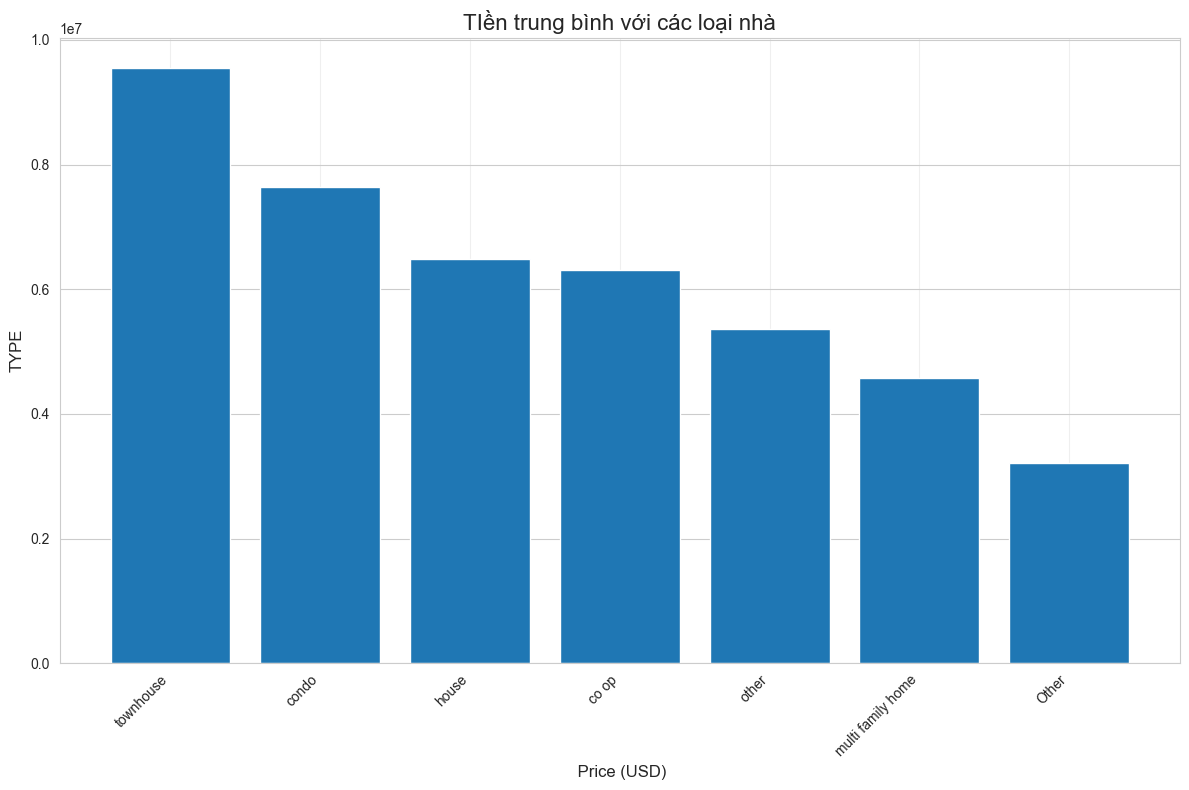

In [64]:
avg_type = df_luxury.groupby("PROPERTY_TYPE")['PRICE'].mean().reset_index()
avg_type = avg_type.sort_values(by = "PRICE",ascending=False)
avg_type
plt.bar(avg_type['PROPERTY_TYPE'],avg_type['PRICE'])
plt.xticks(rotation=45, ha='right')
plt.title('TIền trung bình với các loại nhà', fontsize=16)
plt.xlabel(' Price (USD)', fontsize=12)
plt.ylabel('TYPE', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 1. Phân phối giá nhà (PRICE)
- Giá nhà luxury trải rộng từ **5M đến gần 200M USD**.  
- Phân phối lệch phải, nhưng khác với Normal, phần đuôi kéo dài tới hàng trăm triệu USD.  
- Xuất hiện rõ rệt một số **căn siêu sang (super luxury)** trên 50M, kéo trung bình giá lên cao.  

### 2. Phân phối số phòng ngủ (BEDS)
- Phổ biến từ **3–6 phòng ngủ**.  
- Xuất hiện một số căn biệt thự/townhouse có **10+ phòng ngủ**, hiếm nhưng đặc trưng cho phân khúc này.  

### 3. Phân phối số phòng tắm (BATH)
- Đa số có **3–6 phòng tắm**, đi kèm với số phòng ngủ lớn.  
- Một số ít trường hợp cực đoan có trên 10 phòng tắm → biệt thự hoặc căn hộ penthouse nhiều tầng.  

### 4. Phân phối diện tích (PROPERTYSQFT)
- Luxury chủ yếu từ **3,000 – 10,000 sqft**.  
- Một số căn cực lớn trên **20,000 sqft**, thường là biệt thự hoặc penthouse.  

### 5. Phân phối theo môi giới (BROKERTITLE)
- **Compass, Douglas Elliman, Corcoran** dẫn đầu số lượng listing luxury.  
- Các môi giới chuyên phân khúc cao cấp khác: **Serhant, Sotheby’s, Brown Harris Stevens**.  
- Thị trường luxury tập trung trong tay một số ít broker uy tín, mang tính chuyên biệt cao.  

### 6. Phân phối theo loại nhà (PROPERTY_TYPE)
- Luxury tập trung nhiều nhất vào **condo cao cấp và townhouse**.  
- House đơn lập và co-op có nhưng ít hơn.  
- Multi-family home hầu như không xuất hiện trong luxury.  

### 7. Phân phối theo khu vực (BOROUGH)
- **Manhattan áp đảo gần như tuyệt đối**, chỉ một phần rất nhỏ luxury ở Brooklyn.  
- Không có luxury ở Queens, Bronx hay Staten Island.  

---

#### 🔑 Insight chính từ phân tích đơn biến Luxury Segment
1. **Luxury ở NYC gần như đồng nghĩa với Manhattan**, nơi tập trung toàn bộ nguồn cung cao cấp.  
2. Giá dao động rộng, từ **5M – 200M USD**, với một số siêu phẩm kéo phân phối lên cực đoan.  
3. Đặc điểm căn hộ luxury: **diện tích lớn (3,000–10,000 sqft), nhiều phòng (3–6 phòng ngủ, 3–6 phòng tắm)**.  
4. Thị trường được chi phối bởi **một nhóm broker cao cấp**, nổi bật là Compass, Douglas Elliman, Corcoran, Serhant và Sotheby’s.  
5. **Condo & townhouse** là hình thức chính của luxury, phản ánh đặc thù đô thị Manhattan.  

➡️ Luxury segment tại NYC có tính tập trung cực cao về cả **địa lý (Manhattan)** lẫn **broker**. Đây là thị trường khác biệt hoàn toàn so với Normal segment, phục vụ nhóm khách hàng siêu giàu.


In [65]:
import plotly.express as px

fig = px.scatter_mapbox(df_luxury, 
                        lat="LATITUDE", 
                        lon="LONGITUDE", 
                        color="PRICE", 
                        size="PRICE",
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")

# Show the plot
fig.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_2024\1400820636.py:3: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/

